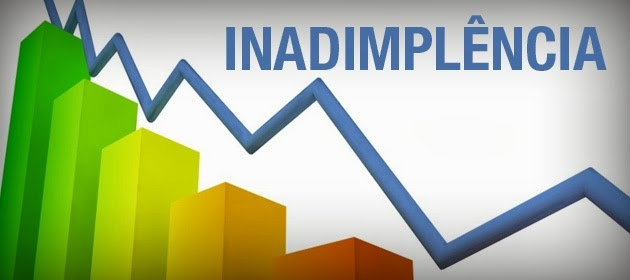

In [1]:
from IPython.display import Image
Image(filename='inadimplência.jpg')

In [252]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score, cross_val_predict, KFold
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler

#modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
import xgboost as xgb


%matplotlib inline

### A inadimplencia é um problema em muitos países e quando falamos de Brasil ela é ainda pior, e por conta disso muitos bancos, para diminuir riscos buscam implementar sistemas de inteligência artificial que calcule o risco se um indivíduo tem uma chance de ser inadimplente para aprovação de crédito.

CONVENÇÕES USADAS NESTA ANÁLISE:
- Para colunas categóricas com até 3 classes usarei gráficos de pizza para visualização.
- As variáveis categóricas passarão por um teste qui-quadrado para testar se há uma uma diferença estatístivamente significativa entre a variável analisada e a variável alvo
- As variáveis contínuas passarão por um teste de hipótese não paramétrico (não assume normalidade da distribuição) se há uma uma diferença estatístivamente significativa entre a variável analisada e a variável alvo

In [3]:
#IMPORTANDO OS DADOS
#importei os dados de Treino com o -pd.read_csv-
train = pd.read_csv('conjunto_de_treinamento.csv').drop('local_onde')
#importei os dados de Teste com o -pd.read_csv-
test = pd.read_csv('conjunto_de_teste.csv')

# EXPLORAÇÃO DOS DADOS

In [4]:
#visualização de uma amostra dos dados, usamos a transposta para poder ver todas as Colunas
train.head(10).T

,0,1,2,3,4,5,6,7,8,9
id_solicitante,1,2,3,4,5,6,7,8,9,10
produto_solicitado,1,1,1,1,7,1,1,1,2,1
dia_vencimento,10,25,20,20,1,20,15,5,25,10
forma_envio_solicitacao,presencial,internet,internet,internet,internet,presencial,presencial,internet,internet,presencial
tipo_endereco,1,1,1,1,1,1,1,1,1,1
sexo,M,F,F,M,F,M,F,F,F,M
idade,85,38,37,37,51,21,64,20,39,44
estado_civil,2,1,2,1,1,1,4,1,2,2
qtde_dependentes,0,0,0,1,3,1,2,0,2,2
grau_instrucao,0,0,0,0,0,0,0,0,0,0


In [5]:
#informações extra sobre cada conluna, temos a seguinte ordem (INDEX) #-# (NOME DA COLUNA) #-# (CONTAGEM DE VALORES NÃO FALTANTES) #-# (TIPO DOS DADOS NA COLUNA) 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id_solicitante                    20000 non-null  int64  
 1   produto_solicitado                20000 non-null  int64  
 2   dia_vencimento                    20000 non-null  int64  
 3   forma_envio_solicitacao           20000 non-null  object 
 4   tipo_endereco                     20000 non-null  int64  
 5   sexo                              20000 non-null  object 
 6   idade                             20000 non-null  int64  
 7   estado_civil                      20000 non-null  int64  
 8   qtde_dependentes                  20000 non-null  int64  
 9   grau_instrucao                    20000 non-null  int64  
 10  nacionalidade                     20000 non-null  int64  
 11  estado_onde_nasceu                20000 non-null  object 
 12  esta

- Temos colunas dos tipos INT64, FLOAT64, OBJECT.

In [6]:
#vendo melhor a quantidade de valores nulos nas colunas citadas acima
train.isnull().sum()

id_solicitante                          0
produto_solicitado                      0
dia_vencimento                          0
forma_envio_solicitacao                 0
tipo_endereco                           0
sexo                                    0
idade                                   0
estado_civil                            0
qtde_dependentes                        0
grau_instrucao                          0
nacionalidade                           0
estado_onde_nasceu                      0
estado_onde_reside                      0
possui_telefone_residencial             0
codigo_area_telefone_residencial        0
tipo_residencia                       536
meses_na_residencia                  1450
possui_telefone_celular                 0
possui_email                            0
renda_mensal_regular                    0
renda_extra                             0
possui_cartao_visa                      0
possui_cartao_mastercard                0
possui_cartao_diners              

- Algumas colunas como "GRAU_INSTRUCAO_COMPANHEIRO", "PROFISSAO_COMPANHEIRO", "PROFISSAO", "OCUPACAO", "TIPO_RESIDENCIA", "MESES_NA_RESIDENCIA" possuem valores faltantes, trataremos desse assunto mais pra frente.

In [7]:
#informações estatísticas das variáveis numéricas contínuas
train[['meses_na_residencia', 'renda_mensal_regular', 'renda_extra', 'valor_patrimonio_pessoal']].describe()

,meses_na_residencia,renda_mensal_regular,renda_extra,valor_patrimonio_pessoal
count,18550.000000,20000.000000,20000.000000,2.000000e+04
mean,9.572453,957.130937,39.096958,2.095614e+03
std,10.649580,11353.965001,1387.428780,4.403344e+04
min,0.000000,69.000000,0.000000,0.000000e+00
25%,1.000000,360.000000,0.000000,0.000000e+00
50%,6.000000,500.000000,0.000000,0.000000e+00
75%,15.000000,800.000000,0.000000,0.000000e+00
max,228.000000,959000.000000,194344.000000,6.000000e+06


In [8]:
#criei essa função para avaliar a normalidade de algumas colunas
def teste_normal(coluna):
    from scipy.stats import normaltest
    print('A hipótese H0 assume que a amostra É proveniente de uma distribuição normal.')
    print('A hipósete H1 assume que a a mostra NÃO é proveniente de uma distribuição normal.')
    print('')
    print('significância = 0.05')
    print('')
    print('Se P_VALOR < SINIFICÂNCIA, H0 é refutada, não é normal.')
    print('Se P_VALOR > SINIFICÂNCIA, H1 é refutada, é normal.')
    print('')
    print('')
    stat_test, p_valor = normaltest(coluna)
    if p_valor < 0.05:
        print('p_valor = {}, H0 refutada, NÃO É NORMAL'.format(p_valor))
    else:
        print('p_valor = {}, H1 refutada, É NORMAL'.format(p_valor))

In [9]:
# Teste de hipóteses para variáveis categóricas 
# Nesse teste verificamos se a diferença do valor observado e do valor esperado é estatísticamente significativa

def teste_qui_quadrado(val1, val2):
    significancia = 0.1
    import pandas as pd
    from scipy.stats import chi2_contingency
    print('Hipótese H0: a diferença entre o valor observado e o valor esperado NÃO É estatísticamente diferente de zero (p_valor < significância)')
    print('Hipótese H1: a diferença entre o valor observado e o valor esperado É estatísticamente diferente de zero (p_valor > significância)')
    print('significância = {}'.format(significancia))
    print('')
    tabela = pd.crosstab(val1, val2)
    val =  chi2_contingency(tabela)
    p_valor = val[1]
    
    if p_valor > significancia:
        print('p_valor é {:.4f}, NÃO tem relação'.format(p_valor))
    else:
        print('p_valor é {:.4f}, TEM relação'.format(p_valor))

In [10]:
# Teste de hipóteses para variáveis contínuas
# Nesse teste verificamos se as distribuições de duas amostras independentes são iguais ou não.
# Esse teste é não paramétrico, então não precisamos que as amostras sejam normais.

def teste_nao_parametrico(amostra1, amostra2):
    significancia = 0.1
    from scipy.stats import mannwhitneyu
    
    print('H0: a distribuição das duas amostras são iguais')
    print('H1: a distribuição das duas amostras NÃO são iguais')

    stat, p_valor = mannwhitneyu(amostra1, amostra2)
    if p_valor > significancia:
        print('P_valor é {}, provavalmente NÃO tem relação'.format(p_valor))
    else:
        print('P_valor é {}, provavalmente TEM relação'.format(p_valor))
    
    

----------

## Investigando as colunas:

----------

### 1) id_solicitante

In [11]:
train['id_solicitante'].head()

0    1
1    2
2    3
3    4
4    5
Name: id_solicitante, dtype: int64

- Se trata de apenas uma Distribuição Uniforme e não terá nenhum valor pro nosso modelo, mas pode ser útil em um Merge futuro de DataFrames, então resolvi mante-la.

----------

### 2) produto_solicitado

Coluna de dados categóricos dividida nas classes abaixo

- 1 = Cartão de crédito
- 2 = Empréstimo Pessoal
- 7 = Empréstimo Consignado

In [12]:
#Retorna a soma da contagem de valores únicos das classes da coluna PRODUTO_SOLICITADO
train['produto_solicitado'].value_counts()

1    17023
2     2435
7      542
Name: produto_solicitado, dtype: int64

In [13]:
#Retorna a proporção de valores únicos das classes da coluna PRODUTO_SOLICITADO
train['produto_solicitado'].value_counts(normalize=True)

1    0.85115
2    0.12175
7    0.02710
Name: produto_solicitado, dtype: float64

- A classe CARTÃO DE CRÉDITO tem a grande maioria dos valores.
### Hipótese 1: Há alguma relação estatísticamente significativa entre as colunas PRODUTO_SOLICITADO e INADIMPLENTE ?

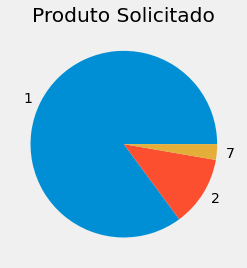

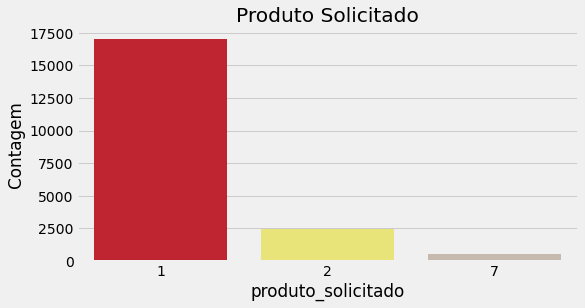

In [14]:
#Podemos ver a contagem das classes de forma mais clara em um gráfico de barras.

#tema do gráfico
matplotlib.style.use('fivethirtyeight')
#Podemos ver essa proporções de forma mais clara em um gráfico de pizza.
fig = plt.figure(figsize=(4,4))
#gráfico de pizza com proporção das classes da coluna PRODUTO_SOLICITADO.
train['produto_solicitado'].value_counts().plot.pie()
plt.ylabel('')
plt.title('Produto Solicitado')
plt.show()

#ajusto o tamanho do gráfico
fig = plt.figure(figsize=(8,4))
ax= sns.countplot(x='produto_solicitado', data=train, palette=['#D90B1C', '#FAF566','#CABAAB'])
#título
plt.title('Produto Solicitado')
#rótulo eixo-y
plt.ylabel('Contagem')

#mostro o gráfico
plt.show()

- Como já vimos nos números e no gráfico de barras a classe CARTÃO DE CRÉDITO tem a maioria dos valores seguido por EMPRÉSTIMO PESSOAL e EMPRÉSTIMO CONSIGNADO, esses dois gráficos ilustram melhor essas proporções.

In [15]:
#cria uma tabela de proporções normalizada pelos Index que nesse caso são os PRODUTOS_SOLICITADOS
tabela_produto_solicitado = pd.crosstab(train['produto_solicitado'], train['inadimplente'], normalize='index')
tabela_produto_solicitado

inadimplente,0,1
produto_solicitado,,
1,0.503437,0.496563
2,0.496099,0.503901
7,0.409594,0.590406


- Na tabela acima podemos observar separadamente a proporção de inadimplentes em cada classe da coluna PRODUTO_SOLICITADO.
- A classe 7 (Empréstimo Consignado) vemos que a proporção de INADIMPLENTES é um pouco maior que NÃO INADIMPLENTES.
- Nas classes 1 (CARTÃO DE CRÉDITO) e 2 (EMPRÉSTIMO PESSOAL) não observamos uma diferença significativa na proporção de NÃO INADIMPLENTES e INADIMPLENTES.


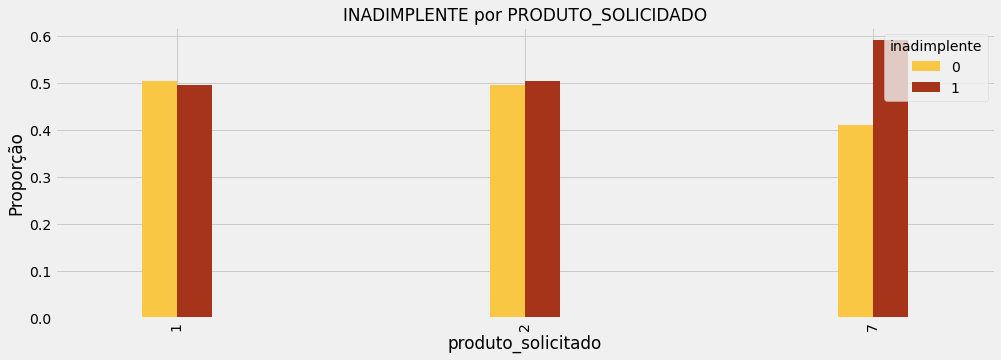

In [16]:
tabela_produto_solicitado.plot(kind='bar', width=0.2, color=['#F9C743', '#A6341B'],figsize=(15,5))
plt.title('INADIMPLENTE por PRODUTO_SOLICIDADO', fontdict={'fontsize':17})
plt.ylabel('Proporção')
plt.show()

- O gráfico nos ajuda a ver as proporções de forma mais clara.
- Para verificar se a diferenças observadas são estatísticamente significativas devemos fazer um teste qui-quadrado

In [17]:
#teste de hipótese qui-quadrado produto solicitado
teste_qui_quadrado(train['produto_solicitado'], train['inadimplente'])

Hipótese H0: a diferença entre o valor observado e o valor esperado NÃO É estatísticamente diferente de zero (p_valor < significância)
Hipótese H1: a diferença entre o valor observado e o valor esperado É estatísticamente diferente de zero (p_valor > significância)
significância = 0.1

p_valor é 0.0001, TEM relação


Insights:
- Resposta Hipótese 1: Sim, há relação entre a variável PRODUTO_SOLICITADO e o alvo (INADIMPLENTE)

----------

### 3) dia_vencimento

In [18]:
train['dia_vencimento'].value_counts()

10    7847
15    3557
25    3089
5     2825
20    1952
1      730
Name: dia_vencimento, dtype: int64

In [19]:
train['dia_vencimento'].value_counts(normalize=True)

10    0.39235
15    0.17785
25    0.15445
5     0.14125
20    0.09760
1     0.03650
Name: dia_vencimento, dtype: float64

- Podemos observar uma quantidade superior de vencimentos no dia 10, no gráfico de barras abaixo poderemos observar melhor.

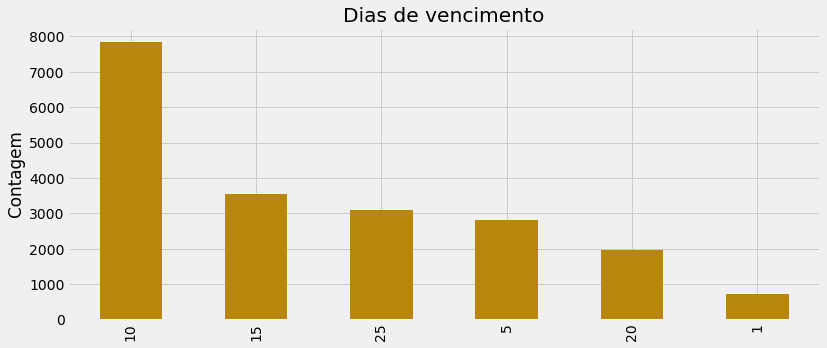

In [20]:
fig = plt.figure(figsize=(12,5))
train['dia_vencimento'].value_counts().plot.bar(color='#b8860b')
plt.title('Dias de vencimento')
plt.ylabel('Contagem')
plt.show()

- Podemos observar que o dia 10 tem uma frequência maior e isso pode indicar proximidade ao dia do pagamento

In [21]:
tabela_dia_vencimento = pd.crosstab(train['dia_vencimento'], train['inadimplente'], normalize='index')
tabela_dia_vencimento

inadimplente,0,1
dia_vencimento,,
1,0.487671,0.512329
5,0.541947,0.458053
10,0.536893,0.463107
15,0.481867,0.518133
20,0.455943,0.544057
25,0.419553,0.580447


### Hipótese 2: Há alguma relação estatísticamente significativa entre as colunas DIA_VENCIMENTO e INADIMPLENTE ?

Text(0, 0.5, 'Proporção')

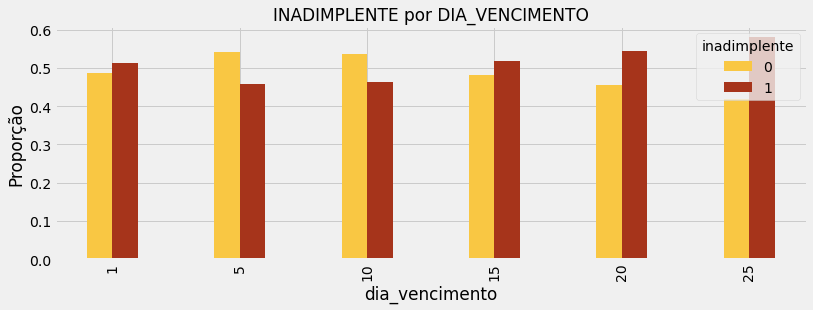

In [22]:
tabela_dia_vencimento.plot(kind='bar', width=0.4, color=['#F9C743', '#A6341B'], figsize=(12,4))
plt.title('INADIMPLENTE por DIA_VENCIMENTO', fontdict={'fontsize':17})
plt.ylabel('Proporção')


- Como já observamos na tabela a partir do meio do mês o número de INADIMPLENTES vai aumentando

- Grande desbalanco entre as classes

In [23]:
teste_qui_quadrado(train['dia_vencimento'], train['inadimplente'])

Hipótese H0: a diferença entre o valor observado e o valor esperado NÃO É estatísticamente diferente de zero (p_valor < significância)
Hipótese H1: a diferença entre o valor observado e o valor esperado É estatísticamente diferente de zero (p_valor > significância)
significância = 0.1

p_valor é 0.0000, TEM relação


Insights:
- Resposta Hipótese 2: Sim, há relação entre a variável DIA_VENCIMENTO e o alvo (INADIMPLENTE)
- Podemos observar uma tendência de maior taxa de INADIMPLÊNCIA nos pagamentos que são efetuados a partir da metade do mês
- Será que os clientes que pagam nos dias 5 e 10 são assalariados? e por causa disso tem uma "estabilidade" maior em suas contas?


----------

### 4) forma_envio_solicitacao

In [24]:
train['forma_envio_solicitacao'].value_counts()

internet      11264
presencial     7855
correio         881
Name: forma_envio_solicitacao, dtype: int64

In [25]:
train['forma_envio_solicitacao'].value_counts(normalize=True)

internet      0.56320
presencial    0.39275
correio       0.04405
Name: forma_envio_solicitacao, dtype: float64

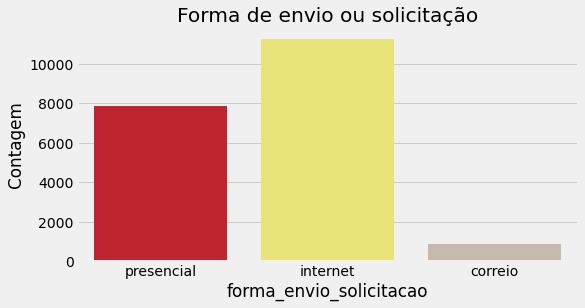

In [26]:
#gráfico de barras vai nos ajudar a visualizar melhor as classes
fig = plt.figure(figsize=(8,4))
ax= sns.countplot(x='forma_envio_solicitacao', data=train, palette=['#D90B1C', '#FAF566','#CABAAB'])
plt.title('Forma de envio ou solicitação')
plt.ylabel('Contagem')
plt.show()

In [27]:
tabela_forma_envio_solicitacao = pd.crosstab(train['forma_envio_solicitacao'], train['inadimplente'], normalize='index')
tabela_forma_envio_solicitacao

inadimplente,0,1
forma_envio_solicitacao,,
correio,0.540295,0.459705
internet,0.502752,0.497248
presencial,0.491534,0.508466


### Hipótese 3: Há alguma relação estatísticamente significativa entre as colunas FORMA_ENVIO_SOLICITACAO e INADIMPLENTE ?

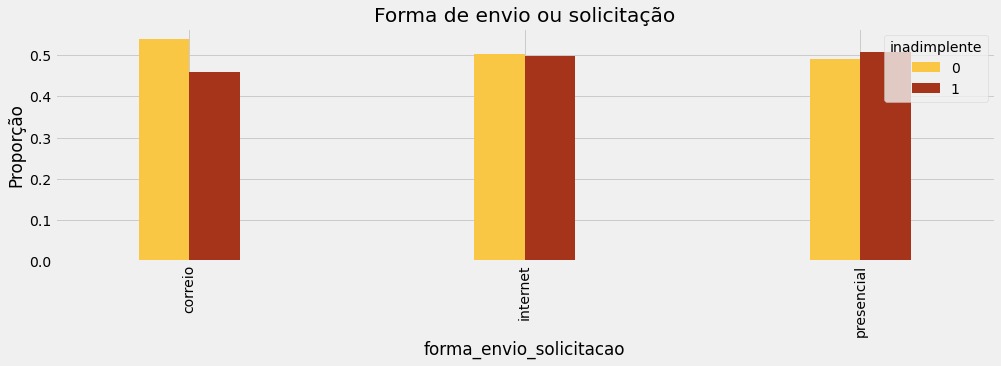

In [28]:
tabela_forma_envio_solicitacao.plot(kind='bar',width=0.3, figsize=(15,4), color=['#F9C743', '#A6341B'])
plt.ylabel('Proporção')
plt.title('Forma de envio ou solicitação')
plt.show()

In [29]:
teste_qui_quadrado(train['forma_envio_solicitacao'], train['inadimplente'])

Hipótese H0: a diferença entre o valor observado e o valor esperado NÃO É estatísticamente diferente de zero (p_valor < significância)
Hipótese H1: a diferença entre o valor observado e o valor esperado É estatísticamente diferente de zero (p_valor > significância)
significância = 0.1

p_valor é 0.0156, TEM relação


Insights:
- Resposta Hipótese 3: Sim, há relação
- As classes INTERNET e PRESENCIAL estão bem balanceadas, no entando a classe CORREIO tem uma quantidade menor de inadimplentes
- Hipótese: Será que pessoas mais velhas usam o mais os correios e por isso há esse desbalanço nas classes da coluna INADIMPLENTE

----------

### 5) tipo_endereco

In [30]:
train['tipo_endereco'].value_counts()

1    19873
2      127
Name: tipo_endereco, dtype: int64

In [31]:
train['tipo_endereco'].value_counts(normalize=True)

1    0.99365
2    0.00635
Name: tipo_endereco, dtype: float64

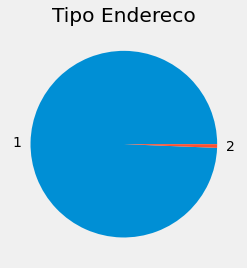

In [32]:
matplotlib.style.use('fivethirtyeight')
fig = plt.figure(figsize=(4,4))
train['tipo_endereco'].value_counts().plot.pie()
plt.title('Tipo Endereco')
plt.ylabel('')
plt.show()

- A classe 1 tem a maioria dos valores

In [33]:
tabela_tipo_endereco = pd.crosstab(train['tipo_endereco'], train['inadimplente'], normalize='index')
tabela_tipo_endereco

inadimplente,0,1
tipo_endereco,,
1,0.499824,0.500176
2,0.527559,0.472441


### Hipótese 4: Há alguma relação estatísticamente significativa entre as colunas TIPO_ENDERECO e INADIMPLENTE ?

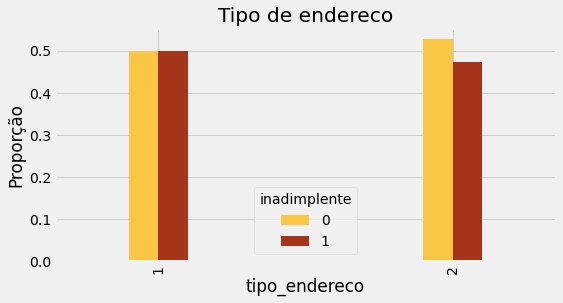

In [34]:
tabela_tipo_endereco.plot(kind='bar', width=0.2,figsize=(8,4), color=['#F9C743', '#A6341B'])
plt.title('Tipo de endereco')
plt.ylabel('Proporção')
plt.show()

- A CLASSE 1 da coluna TIPO_ENDERECO está bem balanceada diferentemente da CLASSE 2 que tem um pequeno desbalanço.
- Hipótese: Será que criando um dummie com a classe 2 para alimentar nosso modelo teremos um melhor desempenho?
- A classe 2 tem um pequeno desbalanço, mas essa classe representa 0.6% dos valores então não sei se adicionaria muita informação ao nosso modelo

In [35]:
teste_qui_quadrado(train['tipo_endereco'], train['inadimplente'])

Hipótese H0: a diferença entre o valor observado e o valor esperado NÃO É estatísticamente diferente de zero (p_valor < significância)
Hipótese H1: a diferença entre o valor observado e o valor esperado É estatísticamente diferente de zero (p_valor > significância)
significância = 0.1

p_valor é 0.5933, NÃO tem relação


Insights:
- Resposta Hipótese 4: Não há relação
- A classe 1 tem 99% dos valores e está muito bem balanceada, isso explica a conclusão da Hipótese 4

----------

### 6) sexo

In [36]:
train['sexo'].value_counts()

F    12246
M     7722
N       25
         7
Name: sexo, dtype: int64

In [37]:
train['sexo'].value_counts(normalize=True)

F    0.61230
M    0.38610
N    0.00125
     0.00035
Name: sexo, dtype: float64

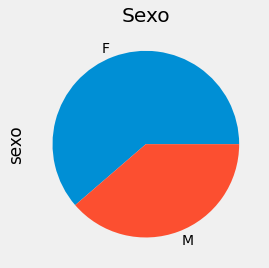

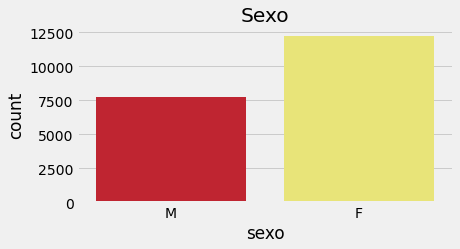

In [38]:
matplotlib.style.use('fivethirtyeight')
query_sexo = train.query('sexo =="F" or sexo=="M"')
fig=plt.figure(figsize=(4,4))
query_sexo['sexo'].value_counts().plot.pie()
plt.title('Sexo')
fig=plt.figure(figsize=(6,3))
ax= sns.countplot(x='sexo', data=query_sexo, palette=['#D90B1C', '#FAF566'])
plt.title('Sexo')
plt.show()

In [39]:
query_sexo = train.query(' sexo =="F" or sexo=="M" ')
tabela_sexo = pd.crosstab(query_sexo['sexo'], train['inadimplente'], normalize='index')
tabela_sexo

inadimplente,0,1
sexo,,
F,0.511841,0.488159
M,0.481481,0.518519


### Hipótese 5: Há alguma relação estatísticamente significativa entre as colunas SEXO e INADIMPLENTE ?

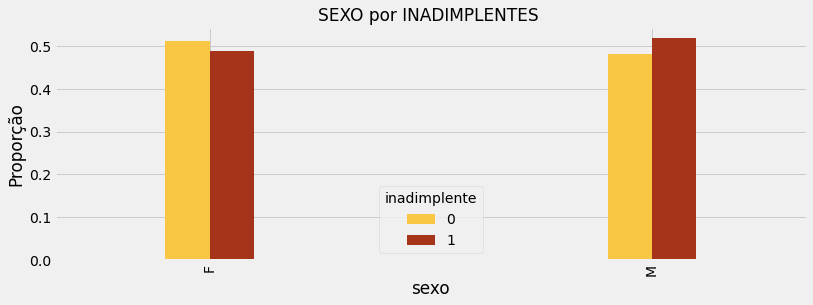

In [40]:
tabela_sexo.plot(kind='bar', figsize=(12,4), width=0.2, color=['#F9C743', '#A6341B'])
plt.title('SEXO por INADIMPLENTES ',fontdict={'fontsize':17})
plt.ylabel('Proporção')
plt.show()

In [41]:
teste_qui_quadrado(train['sexo'], train['inadimplente'])

Hipótese H0: a diferença entre o valor observado e o valor esperado NÃO É estatísticamente diferente de zero (p_valor < significância)
Hipótese H1: a diferença entre o valor observado e o valor esperado É estatísticamente diferente de zero (p_valor > significância)
significância = 0.1

p_valor é 0.0003, TEM relação


Insights:
- Ambos os sexos tem um desbalanço na quantidade de inadimplências, o sexo F tende a ser menos inadimplente que o sexo M.
- Resposta Hipótese 5: Sim, há relação

----------

### 7) idade

In [42]:
train['idade'].describe()

count    20000.000000
mean        42.352500
std         14.930177
min          7.000000
25%         31.000000
50%         40.000000
75%         52.000000
max        106.000000
Name: idade, dtype: float64

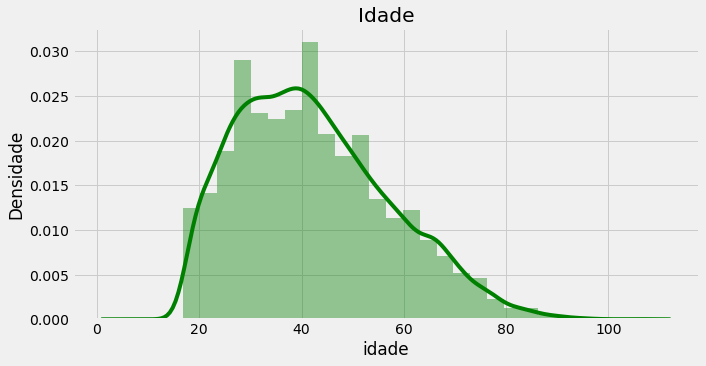

In [43]:
fig=plt.figure(figsize=(10,5))
ax = sns.distplot(a=train['idade'], color='green',bins=30, kde=True)
plt.ylabel('Densidade')
plt.title('Idade')
plt.show()

- A distribuição parece ser normal visualmente, mas vamos executar um teste de normalidade para saber exatamente.

In [44]:
teste_normal(train['idade'])

A hipótese H0 assume que a amostra É proveniente de uma distribuição normal.
A hipósete H1 assume que a a mostra NÃO é proveniente de uma distribuição normal.

significância = 0.05

Se P_VALOR < SINIFICÂNCIA, H0 é refutada, não é normal.
Se P_VALOR > SINIFICÂNCIA, H1 é refutada, é normal.


p_valor = 3.133408646418246e-208, H0 refutada, NÃO É NORMAL


### Hipótese 6: Há alguma relação estatísticamente significativa entre as colunas IDADE e INADIMPLENTE ?

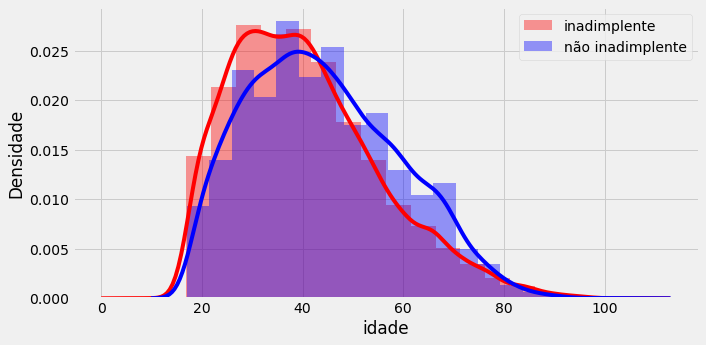

In [45]:
#sabendo que nossa coluna IDADE é normal, podemos comparar as amostras pelas classes da coluna INADIMPLENTE.
idade_inadimplente = train.query('inadimplente==1')
idade_nao_inadimplente = train.query('inadimplente==0')
plt.figure(figsize=(10,5))
ax = sns.distplot(a=idade_inadimplente['idade'], color='red',bins=20, kde=True, norm_hist=True, label='inadimplente')
plt.ylabel('Densidade')
ax2 = sns.distplot(a=idade_nao_inadimplente['idade'], color='blue',bins=20,kde=True, norm_hist=True, label='não inadimplente')
plt.legend()
plt.show()

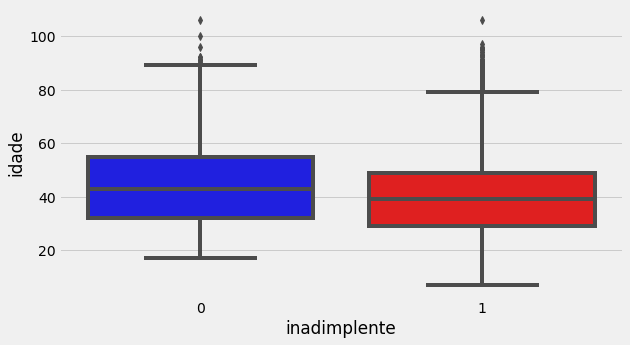

In [46]:
fig=plt.figure(figsize=(9,5))
sns.boxplot(x='inadimplente', y='idade', data=train, palette=['blue', 'red'])
plt.show()

- Os histogramas estão bem com os valores centrais bem próximos, mas não posso afirmar estatísticamente se tem a mesma distribuição.
- Para responder a Hipótese podemos fazer um Teste de Hipóteses, no entanto esse teste tem como premissa a **NORMALIDADE** das amostras
- Outra opção que temos são os testes não paramétricos que não precisam que a amostra seja normal para funcionar

In [47]:
#teste não paramétrico entre as amostras de idade com pessoas inadimplentes e não inadimplentes
teste_nao_parametrico(idade_inadimplente['idade'], idade_nao_inadimplente['idade'])

H0: a distribuição das duas amostras são iguais
H1: a distribuição das duas amostras NÃO são iguais
P_valor é 5.30873155646544e-73, provavalmente TEM relação


Insights:
- A distribuição de idade não é NORMAL

----------

### 8) estado_civil

In [48]:
train['estado_civil'].value_counts()

2    10088
1     6519
4     1573
6      763
5      522
3      234
7      220
0       81
Name: estado_civil, dtype: int64

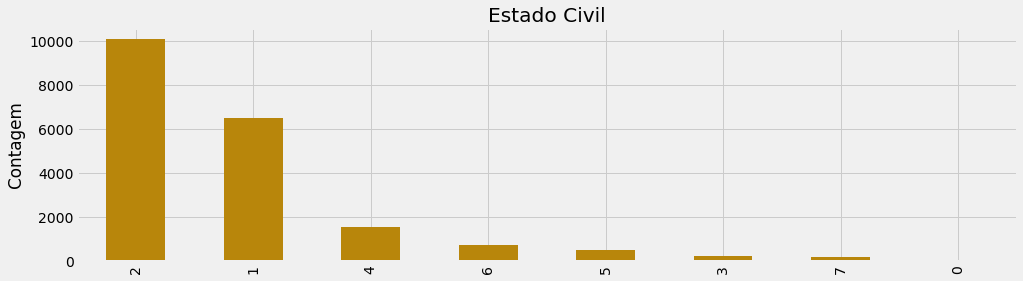

In [49]:
train['estado_civil'].value_counts().plot(kind='bar', figsize=(15,4), color='#b8860b')
plt.title('Estado Civil')
plt.ylabel('Contagem')
plt.show()

- Vemos uma prevalência na classe 2 pois representa mais da metade dos dados.

In [50]:
tabela_estado_civil = pd.crosstab(train['estado_civil'], train['inadimplente'], normalize='index')
tabela_estado_civil

inadimplente,0,1
estado_civil,,
0,0.543210,0.456790
1,0.453290,0.546710
2,0.520420,0.479580
3,0.542735,0.457265
4,0.571519,0.428481
5,0.517241,0.482759
6,0.448231,0.551769
7,0.513636,0.486364


### Hipótese 7: Há alguma relação estatísticamente significativa entre as colunas ESTADO_CIVIL e INADIMPLENTE ?

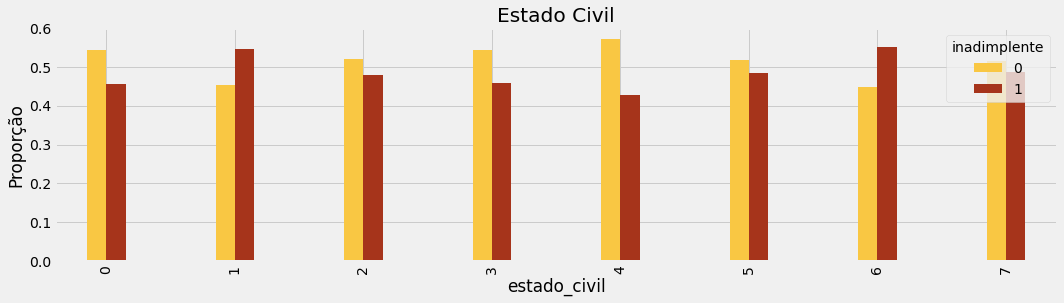

In [51]:
tabela_estado_civil.plot(kind='bar', figsize=(16,4), width=0.3, color=['#F9C743', '#A6341B'])
plt.title('Estado Civil')
plt.ylabel('Proporção')
plt.show()

In [52]:
teste_qui_quadrado(train['estado_civil'], train['inadimplente'])

Hipótese H0: a diferença entre o valor observado e o valor esperado NÃO É estatísticamente diferente de zero (p_valor < significância)
Hipótese H1: a diferença entre o valor observado e o valor esperado É estatísticamente diferente de zero (p_valor > significância)
significância = 0.1

p_valor é 0.0000, TEM relação


Insights:
- Todos os estados civis apresentam um desbalanço entra as classes INADIMPLENTE, alguns pra NAO INADIMPLENTE e outros pra INADIMPLENTES
- Resposta Hipótese 7: Sim, há relação

----------

### 9) qtde_dependentes

In [53]:
train['qtde_dependentes'].value_counts()

0     13350
1      2814
2      2189
3      1029
4       352
5       149
6        57
7        22
8        14
9         9
10        7
11        4
13        2
14        1
53        1
Name: qtde_dependentes, dtype: int64

- O valor de quantidade de dependentes igual a 53 parece ser um outlier então  retirei para não atrapalhar nossas análises.

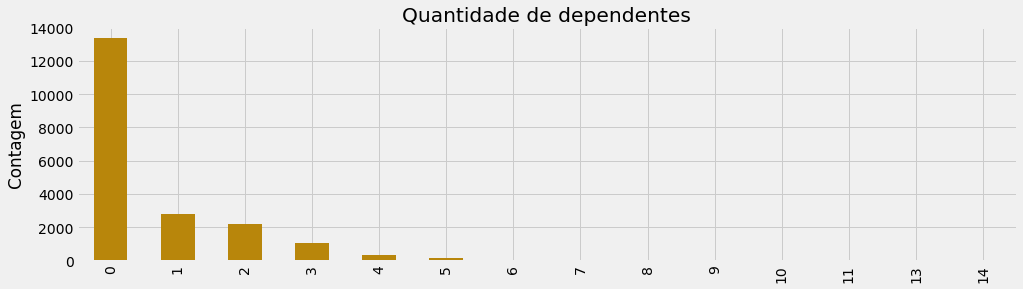

In [54]:
#filtrando o valor discrepante do dataframe
query_qtde_dependentes = train.query('qtde_dependentes < 53')['qtde_dependentes'].value_counts().plot(kind='bar', figsize=(15,4), color='#b8860b')
plt.title('Quantidade de dependentes')
plt.ylabel('Contagem')
plt.show()

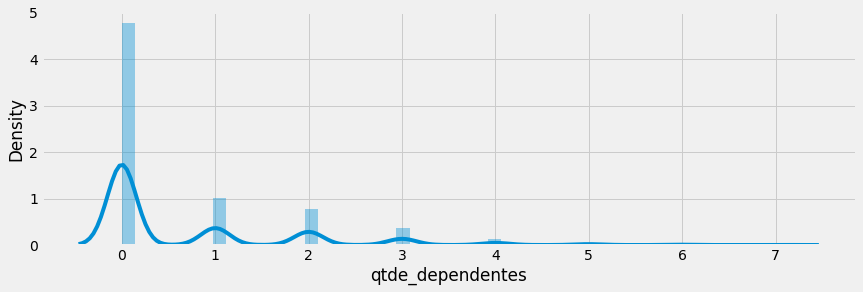

In [55]:
fig=plt.figure(figsize=(13,4))
sns.distplot(a=train.query('qtde_dependentes <8')['qtde_dependentes'])
plt.show()

In [56]:
teste_normal(train['qtde_dependentes'])

A hipótese H0 assume que a amostra É proveniente de uma distribuição normal.
A hipósete H1 assume que a a mostra NÃO é proveniente de uma distribuição normal.

significância = 0.05

Se P_VALOR < SINIFICÂNCIA, H0 é refutada, não é normal.
Se P_VALOR > SINIFICÂNCIA, H1 é refutada, é normal.


p_valor = 0.0, H0 refutada, NÃO É NORMAL


### Hipótese 8: Há alguma relação estatísticamente significativa entre as colunas QTDE_DEPENDENTES e INADIMPLENTE ?

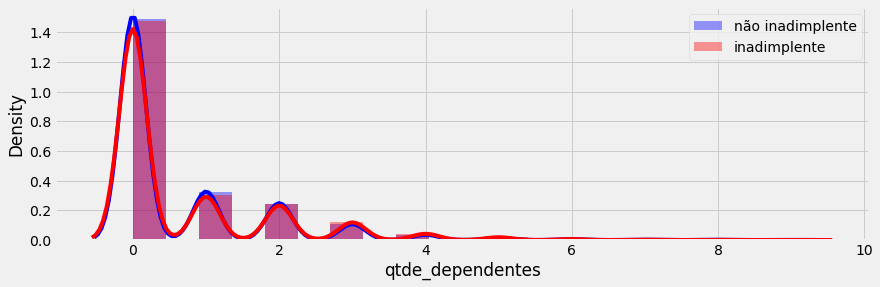

In [57]:
fig=plt.figure(figsize=(13,4))
sns.distplot(a=train.query('inadimplente == 0 and qtde_dependentes < 10')['qtde_dependentes'], color='blue', label= 'não inadimplente', bins=20)
sns.distplot(a=train.query('inadimplente == 1 and qtde_dependentes < 10')['qtde_dependentes'], color='red', label= 'inadimplente', bins=20)
plt.legend()
plt.show()

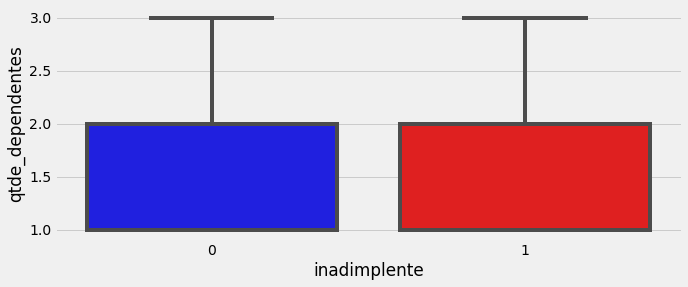

In [58]:
#ignorei os outliers para facilitar a visualização dos box
fig = plt.figure(figsize=(10,4))
sns.boxplot(x='inadimplente', y=train.query('qtde_dependentes > 0 and qtde_dependentes < 4')['qtde_dependentes'], data=train, palette=['blue', 'red'])
plt.show()

In [60]:
train['qtde_dependentes'].value_counts()

0     13350
1      2814
2      2189
3      1029
4       352
5       149
6        57
7        22
8        14
9         9
10        7
11        4
13        2
14        1
53        1
Name: qtde_dependentes, dtype: int64

In [63]:
teste_nao_parametrico(train.query('inadimplente==1 and qtde_dependentes < 10')['qtde_dependentes'],
                      train.query('inadimplente==0 and qtde_dependentes < 10')['qtde_dependentes'])

H0: a distribuição das duas amostras são iguais
H1: a distribuição das duas amostras NÃO são iguais
P_valor é 0.0554797210539222, provavalmente TEM relação


Insight:
- Resultado Hipótese 8: Sim, tem relação

----------

### 10) grau_instrucao

In [64]:
train['grau_instrucao'].value_counts()

0    20000
Name: grau_instrucao, dtype: int64

- Essa coluna contém apenas valores nulos, logo não há utilidade em usa-la

----------

### 11) nacionalidade

In [65]:
train['nacionalidade'].value_counts()

1    19152
0      808
2       40
Name: nacionalidade, dtype: int64

In [66]:
train['nacionalidade'].value_counts(normalize=True)

1    0.9576
0    0.0404
2    0.0020
Name: nacionalidade, dtype: float64

- a nacionalidade de classe 1 representa a maioria dos valores, acredito que a classe 1 represente a nacionalidade brasileira.

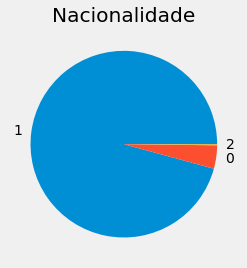

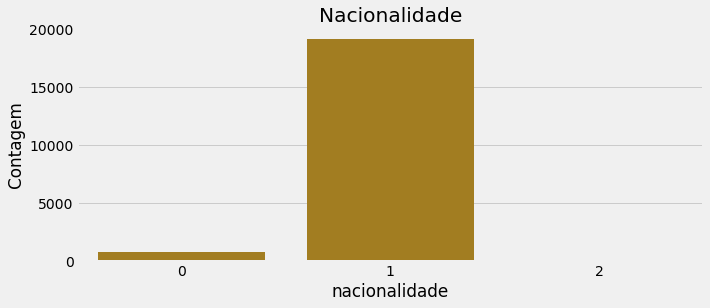

In [67]:
matplotlib.style.use('fivethirtyeight')

train['nacionalidade'].value_counts().plot(kind='pie', figsize=(8,4))
plt.title('Nacionalidade')
plt.ylabel('')
plt.show()
fig=plt.figure(figsize=(10,4))
ax= sns.countplot(x='nacionalidade', data=train, color='#b8860b')
plt.title('Nacionalidade')
plt.ylabel('Contagem')
plt.show()

In [68]:
tabela_nacionalidade = pd.crosstab(train['nacionalidade'], train['inadimplente'], normalize='index')
tabela_nacionalidade

inadimplente,0,1
nacionalidade,,
0,0.501238,0.498762
1,0.499948,0.500052
2,0.500000,0.500000


### Hipótese 9: Há alguma relação estatísticamente significativa entre as colunas NACIONALIDADE e INADIMPLENTE ?

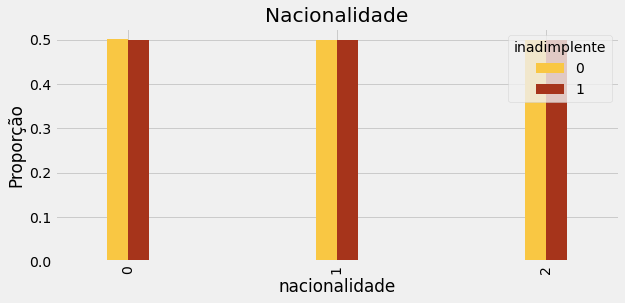

In [69]:
tabela_nacionalidade.plot(kind='bar', width=0.2, figsize=(9,4), color=['#F9C743', '#A6341B'])
plt.title('Nacionalidade')
plt.ylabel('Proporção')

plt.show()

In [70]:
teste_qui_quadrado(train['nacionalidade'], train['inadimplente'])

Hipótese H0: a diferença entre o valor observado e o valor esperado NÃO É estatísticamente diferente de zero (p_valor < significância)
Hipótese H1: a diferença entre o valor observado e o valor esperado É estatísticamente diferente de zero (p_valor > significância)
significância = 0.1

p_valor é 0.9974, NÃO tem relação


Insights:
- Resposta Hipótese 9: Não há relação
- As classes estão bem balanceadas, principalmente a classe 1 que representa a maior parte dos dados, isso explica o resultado do teste qui-quadrado

----------

### 12) estado_onde_nasceu

In [71]:
train['estado_onde_nasceu'].value_counts()

BA    2351
SP    2336
RS    1919
CE    1910
PE    1651
MG    1446
RN     827
       822
PR     764
RJ     720
AL     678
PA     676
PB     608
MA     577
GO     460
MT     375
PI     284
SC     271
ES     251
MS     199
AC     192
SE     153
AM     147
DF     131
AP     102
TO      82
RO      53
RR      15
Name: estado_onde_nasceu, dtype: int64

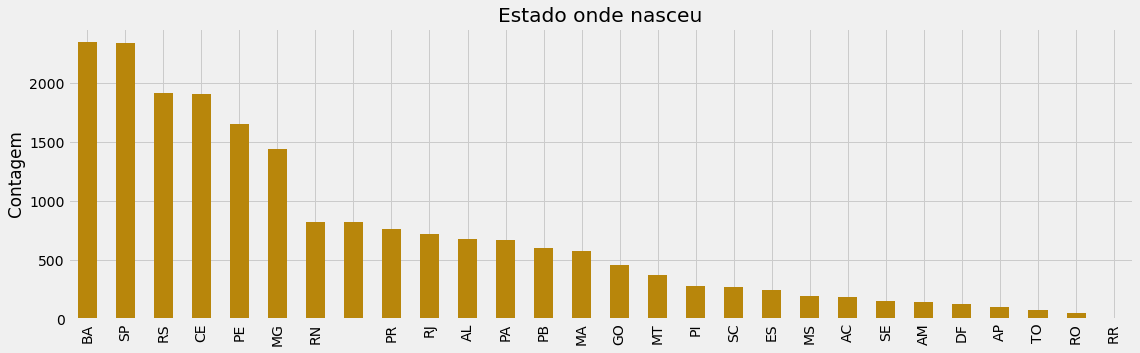

In [72]:
fig=plt.figure(figsize=(10,4))
train['estado_onde_nasceu'].value_counts().plot(kind='bar', figsize=(17,5), color='#b8860b')
plt.title('Estado onde nasceu')
plt.ylabel('Contagem')
plt.show()

In [73]:
tabela_estado_onde_nasceu = pd.crosstab(train['estado_onde_nasceu'], train['inadimplente'], normalize='index')
tabela_estado_onde_nasceu

inadimplente,0,1
estado_onde_nasceu,,
,0.504866,0.495134
AC,0.427083,0.572917
AL,0.470501,0.529499
AM,0.489796,0.510204
AP,0.529412,0.470588
BA,0.487877,0.512123
CE,0.495288,0.504712
DF,0.450382,0.549618
ES,0.501992,0.498008


### Hipótese 10: Há alguma relação estatísticamente significativa entre as colunas ESTADO_ONDE_NASCEU e INADIMPLENTE ?

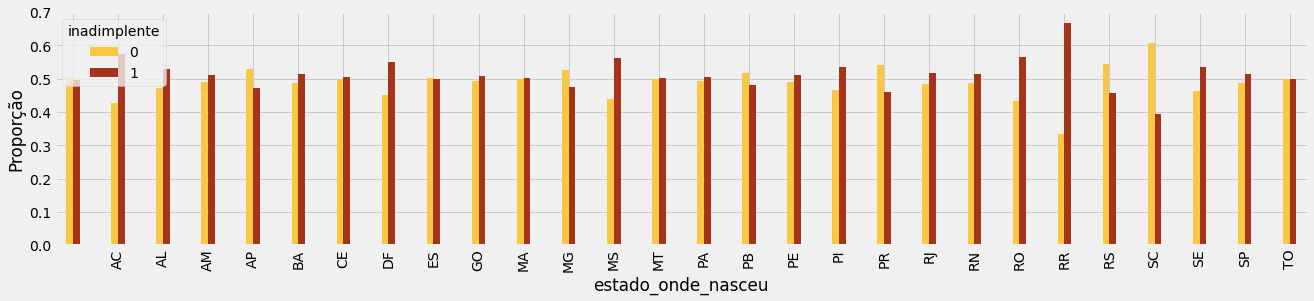

In [74]:
tabela_estado_onde_nasceu.plot(kind='bar', width=0.3, figsize=(20,4), color=['#F9C743', '#A6341B'])
plt.ylabel('Proporção')
plt.show()

In [75]:
teste_qui_quadrado(train['estado_onde_nasceu'], train['inadimplente'])

Hipótese H0: a diferença entre o valor observado e o valor esperado NÃO É estatísticamente diferente de zero (p_valor < significância)
Hipótese H1: a diferença entre o valor observado e o valor esperado É estatísticamente diferente de zero (p_valor > significância)
significância = 0.1

p_valor é 0.0006, TEM relação


Insights:
- Resposta Hipótese 10: Sim, há relação

----------

### 13) estado_onde_reside

In [76]:
train['estado_onde_reside'].value_counts()

SP    3578
BA    2045
RS    1995
CE    1865
PE    1484
MG    1187
PA     927
RJ     863
RN     846
GO     682
PR     610
AL     592
MT     537
PB     499
MA     290
DF     285
MS     274
ES     267
SC     246
AP     198
AM     162
PI     157
RO     125
SE     125
AC      93
TO      43
RR      25
Name: estado_onde_reside, dtype: int64

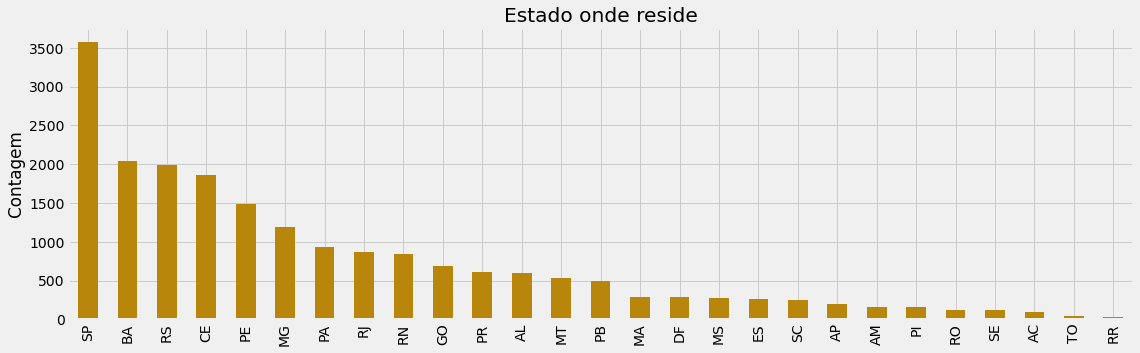

In [77]:
fig=plt.figure(figsize=(10,4))
train['estado_onde_reside'].value_counts().plot(kind='bar', figsize=(17,5), color='#b8860b')
plt.title('Estado onde reside')
plt.ylabel('Contagem')
plt.show()

In [78]:
tabela_estado_onde_reside = pd.crosstab(train['estado_onde_reside'], train['inadimplente'], normalize='index')
tabela_estado_onde_reside

inadimplente,0,1
estado_onde_reside,,
AC,0.483871,0.516129
AL,0.439189,0.560811
AM,0.469136,0.530864
AP,0.550505,0.449495
BA,0.477262,0.522738
CE,0.497587,0.502413
DF,0.442105,0.557895
ES,0.471910,0.528090
GO,0.458944,0.541056


### Hipótese 11: Há alguma relação estatísticamente significativa entre as colunas ESTADO_ONDE_RESIDE e INADIMPLENTE ?

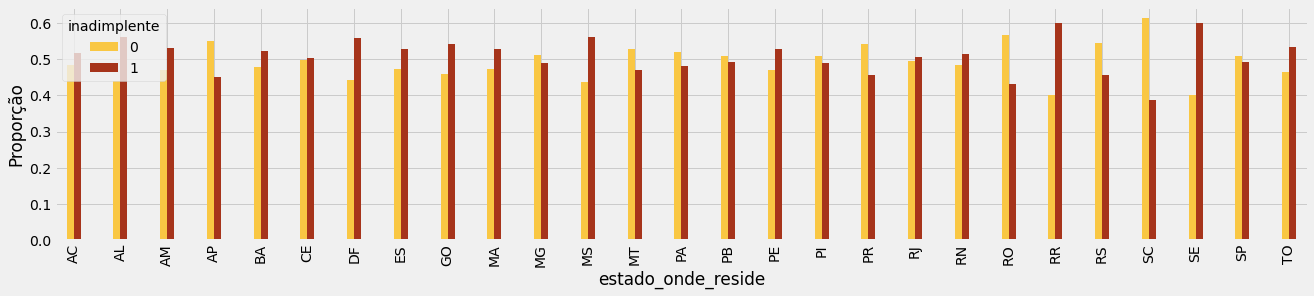

In [79]:
tabela_estado_onde_reside.plot(kind='bar', width=0.3, figsize=(20,4), color=['#F9C743', '#A6341B'])
plt.ylabel('Proporção')
plt.show()

In [80]:
teste_qui_quadrado(train['estado_onde_nasceu'], train['inadimplente'])

Hipótese H0: a diferença entre o valor observado e o valor esperado NÃO É estatísticamente diferente de zero (p_valor < significância)
Hipótese H1: a diferença entre o valor observado e o valor esperado É estatísticamente diferente de zero (p_valor > significância)
significância = 0.1

p_valor é 0.0006, TEM relação


Insights:
- Resposta Hipótese 11: Sim, há relação

----------

### 14) possui telefone residencial

In [81]:
train['possui_telefone_residencial'].value_counts()

Y    16474
N     3526
Name: possui_telefone_residencial, dtype: int64

In [82]:
train['possui_telefone_residencial'].value_counts(normalize=True)

Y    0.8237
N    0.1763
Name: possui_telefone_residencial, dtype: float64

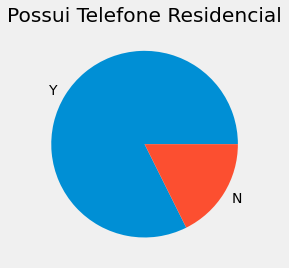

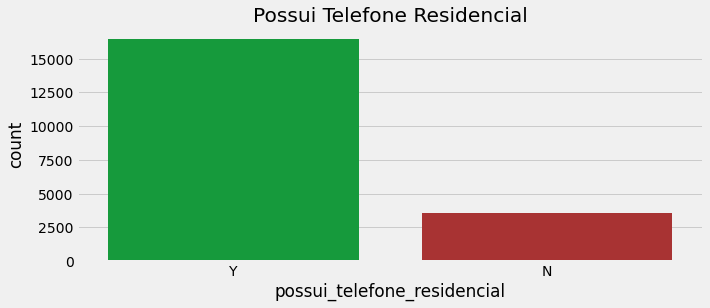

In [83]:
matplotlib.style.use('fivethirtyeight')
train['possui_telefone_residencial'].value_counts().plot(kind='pie', figsize=(8,4))
plt.title('Possui Telefone Residencial')
plt.ylabel('')
plt.show()
fig=plt.figure(figsize=(10,4))
ax= sns.countplot(x='possui_telefone_residencial', data=train, palette=['#00B032','#BB2020'])
plt.title('Possui Telefone Residencial')
plt.show()


In [84]:
tabela_possui_telefone_residencial = pd.crosstab(train['possui_telefone_residencial'], train['inadimplente'], normalize='index')
tabela_possui_telefone_residencial

inadimplente,0,1
possui_telefone_residencial,,
N,0.412649,0.587351
Y,0.518696,0.481304


### Hipótese 12: Há alguma relação estatísticamente significativa entre as colunas POSSUI_TELEFONE_RESIDENCIAL e INADIMPLENTE ?

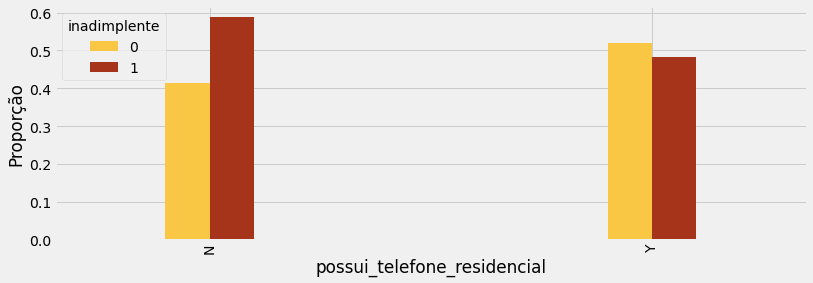

In [85]:
tabela_possui_telefone_residencial.plot(kind='bar', width=0.2, figsize=(12,4), color=['#F9C743', '#A6341B'])
plt.ylabel('Proporção')
plt.show()

In [86]:
teste_qui_quadrado(train['possui_telefone_residencial'], train['inadimplente'])

Hipótese H0: a diferença entre o valor observado e o valor esperado NÃO É estatísticamente diferente de zero (p_valor < significância)
Hipótese H1: a diferença entre o valor observado e o valor esperado É estatísticamente diferente de zero (p_valor > significância)
significância = 0.1

p_valor é 0.0000, TEM relação


Insights:
- Resposta Hipótese 12: Sim, há relação
- Podemos ver um número de inadimplentes maior quando eles não possuem telefone em casa

----------

### 15) codigo_area_telefone_residencial

In [164]:
train['codigo_area_telefone_residencial'].value_counts().head(20)

       3534
5      1838
107    1142
97     1142
54      904
105     646
84      545
81      535
20      534
58      518
100     494
66      417
117     391
103     389
29      384
71      351
112     350
32      333
86      294
67      285
Name: codigo_area_telefone_residencial, dtype: int64

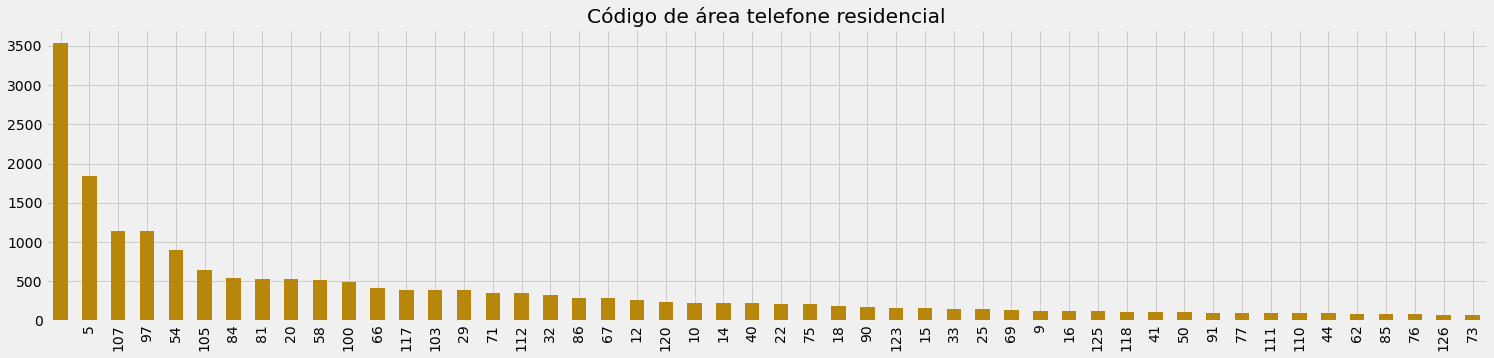

In [89]:
train['codigo_area_telefone_residencial'].value_counts().head(50).plot(kind='bar', figsize=(23,5), color='#b8860b')
plt.title('Código de área telefone residencial')
plt.show()

In [90]:
primeiros_66 = train['codigo_area_telefone_residencial'].value_counts().head(66).index

tabela_codigo_area_telefone_residencial = pd.crosstab(train.query('codigo_area_telefone_residencial in @primeiros_66')['codigo_area_telefone_residencial'],
                                                      train.query('codigo_area_telefone_residencial in @primeiros_66')['inadimplente'],
                                                      normalize='index')
tabela_codigo_area_telefone_residencial

inadimplente,0,1
codigo_area_telefone_residencial,,
,0.412847,0.587153
10,0.537778,0.462222
100,0.459514,0.540486
103,0.537275,0.462725
105,0.521672,0.478328
...,...,...
86,0.568027,0.431973
9,0.503876,0.496124
90,0.565714,0.434286


### Hipótese 13: Há alguma relação estatísticamente significativa entre as colunas CODIGO_AREA_TELEFONE_RESIDENCIAL e INADIMPLENTE ?

- Vou fazer o teste qui_quadrado somende das 66 primeiros números mais frequentes pois senão estaríamos ignorando uma das premissas do teste que é ter no mínimo 5 amostras para comparação

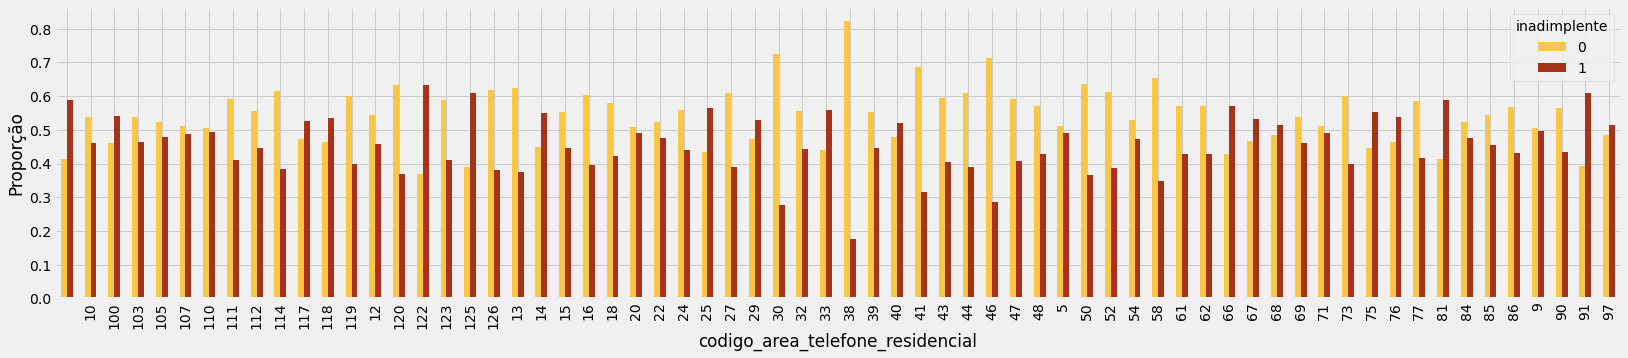

In [91]:
tabela_codigo_area_telefone_residencial.plot(kind='bar', figsize=(25,5), color=['#F9C743', '#A6341B'])
plt.ylabel('Proporção')
plt.show()

In [92]:
teste_qui_quadrado(train.query('codigo_area_telefone_residencial in @primeiros_66')['codigo_area_telefone_residencial'], 
                   train.query('codigo_area_telefone_residencial in @primeiros_66')['inadimplente'])

Hipótese H0: a diferença entre o valor observado e o valor esperado NÃO É estatísticamente diferente de zero (p_valor < significância)
Hipótese H1: a diferença entre o valor observado e o valor esperado É estatísticamente diferente de zero (p_valor > significância)
significância = 0.1

p_valor é 0.0000, TEM relação


Insights:
- muitas classes estão com desbalanço, o que pode trazer informação útil ao nosso modelo
- algumas classes só tem pessoa NAO INADIMPLENTES o que provavelmente não faz sentido e pode gerar ruído nos nossos dados, então devemos retirá-las
- Resposta Hipótese 13: Sim, tem relação

----------

### 16) tipo_residencia

In [93]:
train['tipo_residencia'].value_counts()

1.0    16497
2.0     1635
5.0      827
0.0      331
4.0      126
3.0       48
Name: tipo_residencia, dtype: int64

In [166]:
-train['tipo_residencia'].count() + 20000

536

- Essa coluna possui 536 valores faltantes

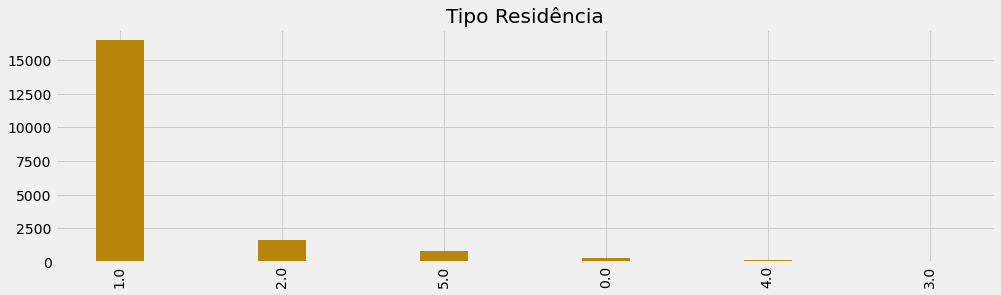

In [95]:
train['tipo_residencia'].value_counts().plot(kind='bar', figsize=(15,4),width=0.3, color='#b8860b')
plt.title('Tipo Residência')
plt.show()

In [96]:
tabela_tipo_residencia = pd.crosstab(train['tipo_residencia'], train['inadimplente'], normalize='index')
tabela_tipo_residencia

inadimplente,0,1
tipo_residencia,,
0.0,0.474320,0.525680
1.0,0.506698,0.493302
2.0,0.446483,0.553517
3.0,0.541667,0.458333
4.0,0.476190,0.523810
5.0,0.477630,0.522370


### Hipótese 14: Há alguma relação estatísticamente significativa entre as colunas TIPO_RESIDENCIA e INADIMPLENTE ?

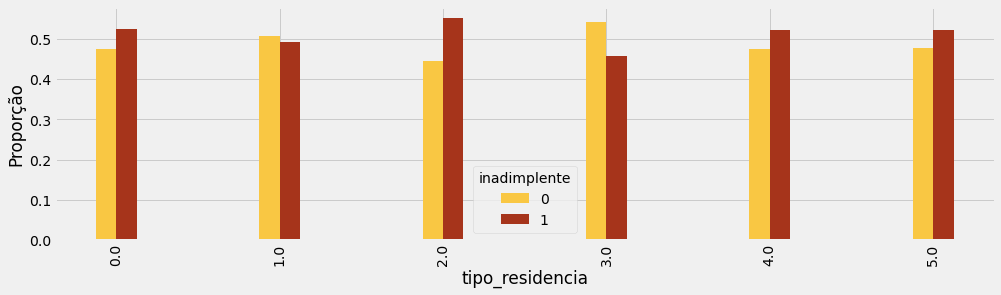

In [97]:
tabela_tipo_residencia.plot(kind='bar', figsize=(15,4), width=0.25, color=['#F9C743', '#A6341B'])
plt.ylabel('Proporção')
plt.show()

In [98]:
teste_qui_quadrado(train['tipo_residencia'], train['inadimplente'])

Hipótese H0: a diferença entre o valor observado e o valor esperado NÃO É estatísticamente diferente de zero (p_valor < significância)
Hipótese H1: a diferença entre o valor observado e o valor esperado É estatísticamente diferente de zero (p_valor > significância)
significância = 0.1

p_valor é 0.0002, TEM relação


Insights:
- Temos classes bem desbalanceadas
- Resposta Hipótese 14: Sim, há relação

----------

### 17) meses_na_residencia

In [99]:
train['meses_na_residencia'].value_counts()

1.0      2937
0.0      1858
10.0     1510
5.0      1486
2.0      1319
         ... 
57.0        1
84.0        1
72.0        1
100.0       1
61.0        1
Name: meses_na_residencia, Length: 76, dtype: int64

In [100]:
train['meses_na_residencia'].value_counts(normalize=True).head(10)

1.0     0.158329
0.0     0.100162
10.0    0.081402
5.0     0.080108
2.0     0.071105
3.0     0.051375
20.0    0.050350
15.0    0.041833
8.0     0.036226
6.0     0.035903
Name: meses_na_residencia, dtype: float64

In [101]:
# somando a contagem das 30 primeiras classes da coluna meses_na_residencia
train['meses_na_residencia'].value_counts(normalize=True).head(30).sum()

0.961024258760108

- A maioria esmagadora dos dados estão nas 30 primeiras classes

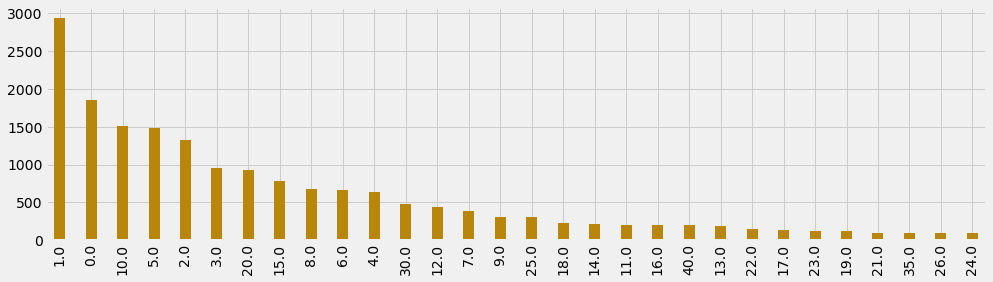

In [102]:
train['meses_na_residencia'].value_counts().head(30).plot(kind='bar', figsize=(15,4),width=0.35, color='#b8860b')
plt.show()

In [103]:
tabela_meses_na_residencia = pd.crosstab(train['meses_na_residencia'], train['inadimplente'], normalize='index').head(19)
tabela_meses_na_residencia

inadimplente,0,1
meses_na_residencia,,
0.0,0.510226,0.489774
1.0,0.501873,0.498127
2.0,0.466262,0.533738
3.0,0.453305,0.546695
4.0,0.455677,0.544323
5.0,0.485868,0.514132
6.0,0.474474,0.525526
7.0,0.485861,0.514139
8.0,0.500000,0.500000


### Hipótese 15: Há alguma relação estatísticamente significativa entre as colunas MESES_NA_RESIDENCIA e INADIMPLENTE ?

In [104]:
train['meses_na_residencia'].describe()

count    18550.000000
mean         9.572453
std         10.649580
min          0.000000
25%          1.000000
50%          6.000000
75%         15.000000
max        228.000000
Name: meses_na_residencia, dtype: float64

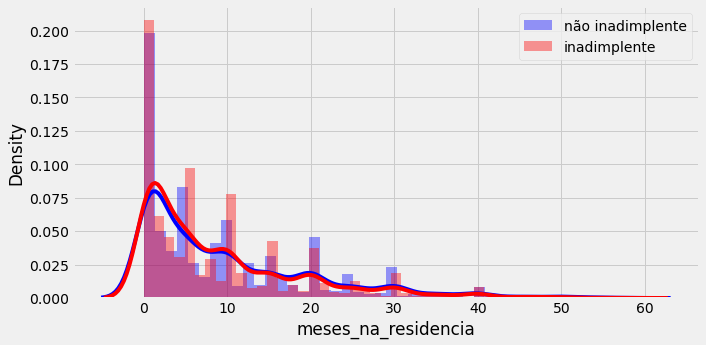

In [105]:
fig=plt.figure(figsize=(10,5))
sns.distplot(a=train.query('inadimplente == 0 and meses_na_residencia < 60')['meses_na_residencia'], color='blue', label= 'não inadimplente')
sns.distplot(a=train.query('inadimplente == 1 and meses_na_residencia <60')['meses_na_residencia'], color='red', label= 'inadimplente')
plt.legend()
plt.show()

In [106]:
teste_nao_parametrico(train.query('inadimplente == 0 and meses_na_residencia < 60')['meses_na_residencia'],
                      train.query('inadimplente == 1 and meses_na_residencia < 60')['meses_na_residencia'])

H0: a distribuição das duas amostras são iguais
H1: a distribuição das duas amostras NÃO são iguais
P_valor é 0.00026786411507517956, provavalmente TEM relação


Insights:
- Das 30 primeiras classes filtradas várias desbalanceadas e algumas bem equilibradas
- Resposta Hipótese 15: Sim, há relação

### 18) possui_telefone_celular

In [107]:
train['possui_telefone_celular'].value_counts()

N    20000
Name: possui_telefone_celular, dtype: int64

Insights e Hipóteses:
- Nessa coluna só há valores da classe negativa, logo deverá ser descartada

----------

### 19) possui_email

In [108]:
train['possui_email'].value_counts()

1    15984
0     4016
Name: possui_email, dtype: int64

In [109]:
train['possui_email'].value_counts(normalize=True)

1    0.7992
0    0.2008
Name: possui_email, dtype: float64

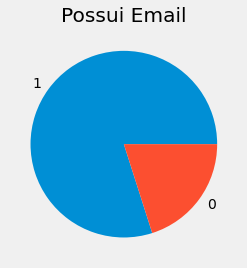

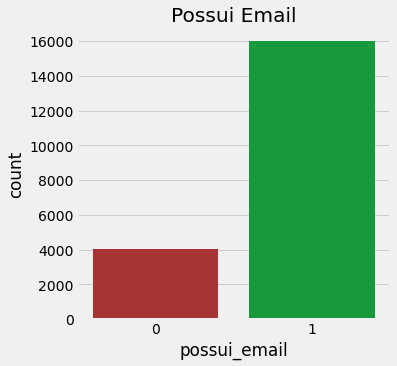

In [110]:
matplotlib.style.use('fivethirtyeight')
train['possui_email'].value_counts().plot(kind='pie', figsize=(10,4))
plt.title('Possui Email')
plt.ylabel('')
plt.show()

fig=plt.figure(figsize=(5,5))
ax= sns.countplot(x='possui_email', data=train, palette=['#BB2020','#00B032'])
plt.title('Possui Email')
plt.show()

- A maioria dos que possuem email são inadimplentes

In [111]:
tabela_possui_email = pd.crosstab(train['possui_email'], train['inadimplente'], normalize='index')
tabela_possui_email

inadimplente,0,1
possui_email,,
0,0.494273,0.505727
1,0.501439,0.498561


### Hipótese 16: Há alguma relação estatísticamente significativa entre as colunas POSSUI_EMAIL e INADIMPLENTE ?

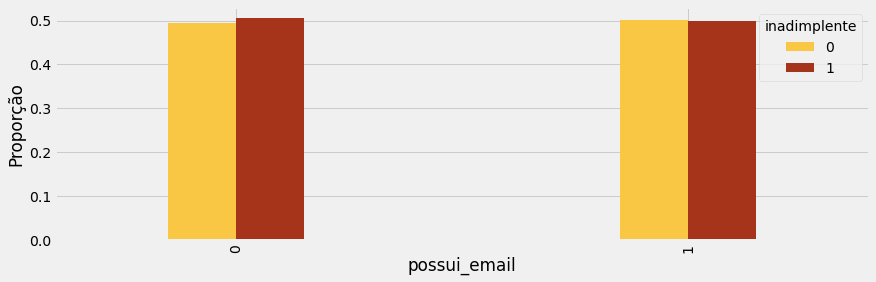

In [112]:
tabela_possui_email.plot(kind='bar',figsize=(13,4), width=0.3, color=['#F9C743', '#A6341B'] )
plt.ylabel('Proporção')
plt.show()

In [113]:
teste_qui_quadrado(train['possui_email'], train['inadimplente'])

Hipótese H0: a diferença entre o valor observado e o valor esperado NÃO É estatísticamente diferente de zero (p_valor < significância)
Hipótese H1: a diferença entre o valor observado e o valor esperado É estatísticamente diferente de zero (p_valor > significância)
significância = 0.1

p_valor é 0.4270, NÃO tem relação


Insights:
- A maioria das pessoas possuem email.
- Resposta Hipótese 16: Não há relação.

----------

### 20) renda_mensal_regular

In [169]:
len(train['renda_mensal_regular'].unique())

3031

- 3031 valores únicos de renda_mensal_regular

In [115]:
train['renda_mensal_regular'].describe()

count     20000.000000
mean        957.130937
std       11353.965001
min          69.000000
25%         360.000000
50%         500.000000
75%         800.000000
max      959000.000000
Name: renda_mensal_regular, dtype: float64

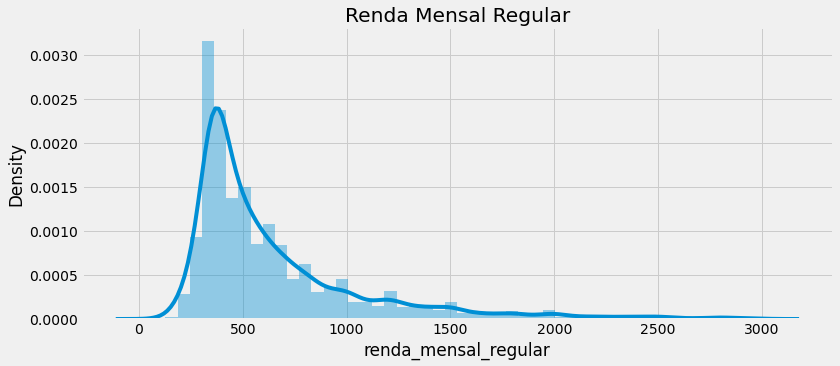

In [116]:
#renda_mensal_regular com alguns filtros adicionados para melhor visualização
fig=plt.figure(figsize=(12, 5))
sns.distplot(a=train.query('renda_mensal_regular < 3000')['renda_mensal_regular'])
plt.title('Renda Mensal Regular')
plt.show()

### Hipótese 17: Há alguma relação estatísticamente significativa entre as colunas RENDA_MENSAL_REGULAR e INADIMPLENTE ?

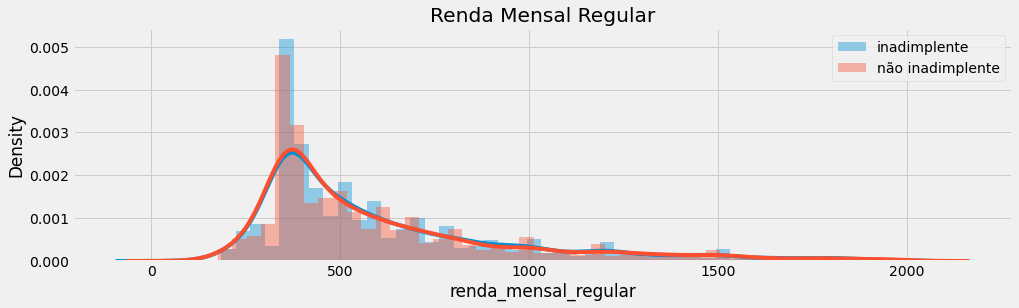

In [117]:
fig=plt.figure(figsize=(15,4))
sns.distplot(a = train.query('inadimplente==1 and renda_mensal_regular < 2000')['renda_mensal_regular'], label= 'inadimplente')
sns.distplot(a = train.query('inadimplente==0 and renda_mensal_regular < 2000')['renda_mensal_regular'], label='não inadimplente')
plt.title('Renda Mensal Regular')
plt.legend()
plt.show()

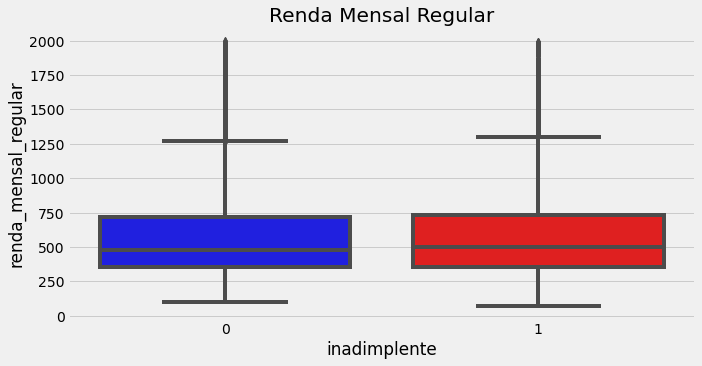

In [118]:
rmr = train.query('renda_mensal_regular < 2000')
fig = plt.figure(figsize=(10,5))
sns.boxplot(data=rmr, x=rmr['inadimplente'], y=rmr['renda_mensal_regular'], palette=['blue', 'red'])
plt.title('Renda Mensal Regular')
plt.show()

In [119]:
teste_nao_parametrico(train.query('inadimplente==1')['renda_mensal_regular'], 
                      train.query('inadimplente==0')['renda_mensal_regular'])

H0: a distribuição das duas amostras são iguais
H1: a distribuição das duas amostras NÃO são iguais
P_valor é 0.46297668257156793, provavalmente NÃO tem relação


Insights:
- A distribuição de renda mensal tende a se concentrar em valores próximos a zero.
- Resposta Hipótese 17: Não há relação.

----------

### 21) renda_extra

In [120]:
train['renda_extra'].value_counts().head(10)

0.0      18930
350.0      136
600.0       61
300.0       58
400.0       57
200.0       57
500.0       53
800.0       31
250.0       29
150.0       25
Name: renda_extra, dtype: int64

In [121]:
train['renda_extra'].value_counts(normalize=True).head(10)

0.0      0.94650
350.0    0.00680
600.0    0.00305
300.0    0.00290
400.0    0.00285
200.0    0.00285
500.0    0.00265
800.0    0.00155
250.0    0.00145
150.0    0.00125
Name: renda_extra, dtype: float64

In [122]:
train['renda_extra'].value_counts(normalize=True).head(10).sum()

0.97185

- 97.18% das linhas estão nos 10 primeiros valores de RENDA_EXTRA
- Retirada de zeros para melhor visualização da distribuição

### Hipótese 18: Há alguma relação estatísticamente significativa entre as colunas RENDA_EXTRA e INADIMPLENTE ?

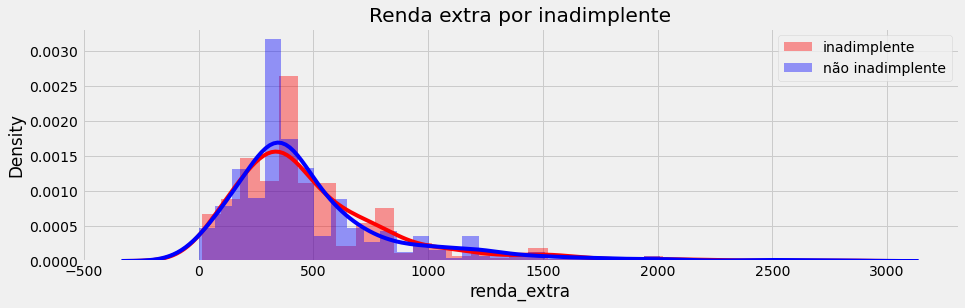

In [123]:
#- Como a maioria dos valores dessa coluna são zero, fiz um filtro para que possamos ver a distrubuição
fig=plt.figure(figsize=(14,4))
sns.distplot(a=train.query('inadimplente==1 and renda_extra > 0 and renda_extra < 3000')['renda_extra'],color='red', label='inadimplente')
sns.distplot(a=train.query('inadimplente==0 and renda_extra > 0 and renda_extra < 3000')['renda_extra'], color='blue', label='não inadimplente')
plt.title('Renda extra por inadimplente')
plt.legend()
plt.show()

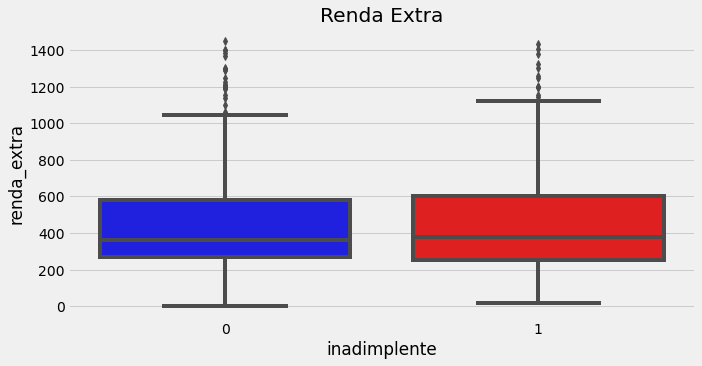

In [124]:
rmr = train.query('renda_extra > 0 and renda_extra < 1500')
fig = plt.figure(figsize=(10,5))
sns.boxplot(data=rmr, x=rmr['inadimplente'], y=rmr['renda_extra'], palette=['blue', 'red'])
plt.title('Renda Extra')
plt.show()

In [125]:
teste_nao_parametrico(train.query('inadimplente==1')['renda_extra'], train.query('inadimplente==0')['renda_extra'])

H0: a distribuição das duas amostras são iguais
H1: a distribuição das duas amostras NÃO são iguais
P_valor é 0.05996042200735972, provavalmente TEM relação


Insights:
- Como a maioria esmagadora dos valores são zero, os gráficos não ajudam muito na visualização.
- Resposta Hipótese 18: Sim, tem relação.

----------

### 22) possui_cartao_visa

In [126]:
train['possui_cartao_visa'].value_counts()

0    17822
1     2178
Name: possui_cartao_visa, dtype: int64

In [127]:
train['possui_cartao_visa'].value_counts(normalize=True)

0    0.8911
1    0.1089
Name: possui_cartao_visa, dtype: float64

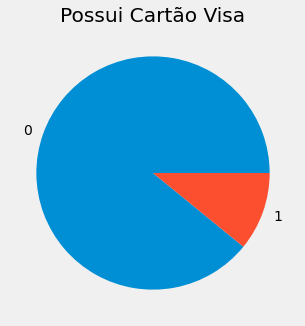

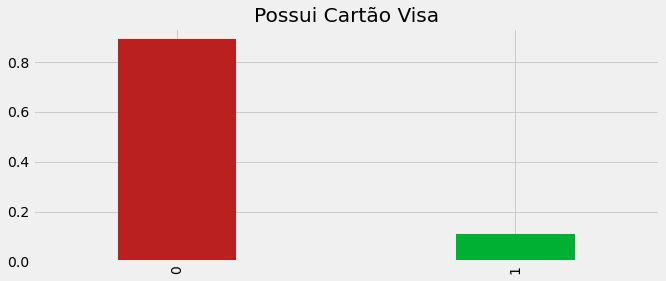

In [128]:
matplotlib.style.use('fivethirtyeight')
fig=plt.figure(figsize=(15,6))
train['possui_cartao_visa'].value_counts().plot(kind='pie', figsize=(5,5))
plt.title('Possui Cartão Visa')
plt.ylabel('')
plt.show()
train['possui_cartao_visa'].value_counts(normalize=True).plot(kind='bar', figsize=(10,4),width=0.35, color=['#BB2020','#00B032'])
plt.title('Possui Cartão Visa')
plt.show()

In [129]:
tabela_possui_cartao_visa = pd.crosstab(train['possui_cartao_visa'], train['inadimplente'], normalize='index')
tabela_possui_cartao_visa

inadimplente,0,1
possui_cartao_visa,,
0,0.499776,0.500224
1,0.501837,0.498163


### Hipótese 19: Há alguma relação estatísticamente significativa entre as colunas POSSUI_CARTAO_VISA e INADIMPLENTE ?

<Figure size 864x288 with 0 Axes>

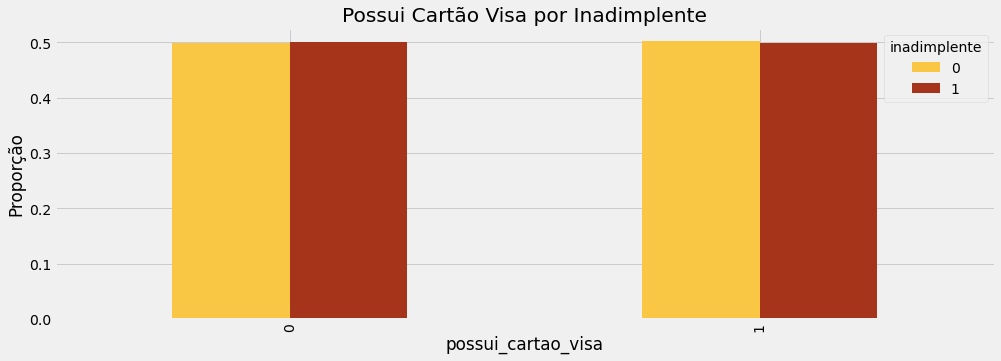

In [130]:
fig=plt.figure(figsize=(12,4))
tabela_possui_cartao_visa.plot(kind='bar', color=['#F9C743', '#A6341B'], figsize=(15,5))
plt.ylabel('Proporção')
plt.title('Possui Cartão Visa por Inadimplente')
plt.show()

In [131]:
teste_qui_quadrado(train['possui_cartao_visa'], train['inadimplente'])

Hipótese H0: a diferença entre o valor observado e o valor esperado NÃO É estatísticamente diferente de zero (p_valor < significância)
Hipótese H1: a diferença entre o valor observado e o valor esperado É estatísticamente diferente de zero (p_valor > significância)
significância = 0.1

p_valor é 0.8738, NÃO tem relação


Insights:
- Resposta Hipótese 19: Não tem relação

----------

### 23) possui_cartao_mastercard

In [132]:
train['possui_cartao_mastercard'].value_counts()

0    18101
1     1899
Name: possui_cartao_mastercard, dtype: int64

In [133]:
train['possui_cartao_mastercard'].value_counts(normalize=True)

0    0.90505
1    0.09495
Name: possui_cartao_mastercard, dtype: float64

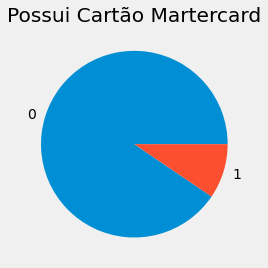

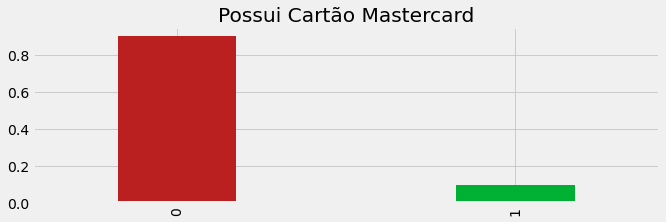

In [134]:
train['possui_cartao_mastercard'].value_counts().plot(kind='pie', figsize=(4,4))
plt.title('Possui Cartão Martercard')
plt.ylabel('')
plt.show()
train['possui_cartao_mastercard'].value_counts(normalize=True).plot(kind='bar', figsize=(10,3),width=0.35, color=['#BB2020','#00B032'])
plt.title('Possui Cartão Mastercard')
plt.show()

In [135]:
tabela_possui_cartao_mastercard = pd.crosstab(train['possui_cartao_mastercard'], train['inadimplente'], normalize='index')
tabela_possui_cartao_mastercard

inadimplente,0,1
possui_cartao_mastercard,,
0,0.496768,0.503232
1,0.530806,0.469194


### Hipótese 20: Há alguma relação estatísticamente significativa entre as colunas POSSUI_CARTAO_MASTERCARD e INADIMPLENTE ?

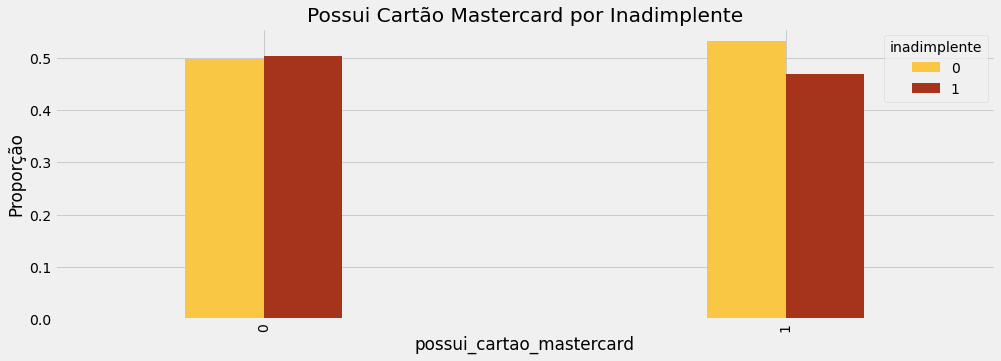

In [136]:
tabela_possui_cartao_mastercard.plot(kind='bar', width=0.3, figsize=(15,5), color=['#F9C743', '#A6341B'])
plt.title('Possui Cartão Mastercard por Inadimplente')
plt.ylabel('Proporção')
plt.show()

In [137]:
teste_qui_quadrado(train['possui_cartao_mastercard'], train['inadimplente'])

Hipótese H0: a diferença entre o valor observado e o valor esperado NÃO É estatísticamente diferente de zero (p_valor < significância)
Hipótese H1: a diferença entre o valor observado e o valor esperado É estatísticamente diferente de zero (p_valor > significância)
significância = 0.1

p_valor é 0.0051, TEM relação


Insights:
- Resposta Hipótese 20: Sim, tem relação.

----------

### 24) possui_cartao_diners

In [138]:
train['possui_cartao_diners'].value_counts()

0    19968
1       32
Name: possui_cartao_diners, dtype: int64

In [139]:
train['possui_cartao_diners'].value_counts(normalize=True)

0    0.9984
1    0.0016
Name: possui_cartao_diners, dtype: float64

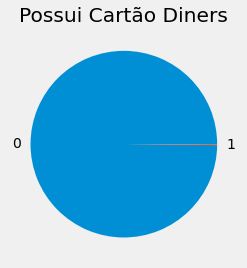

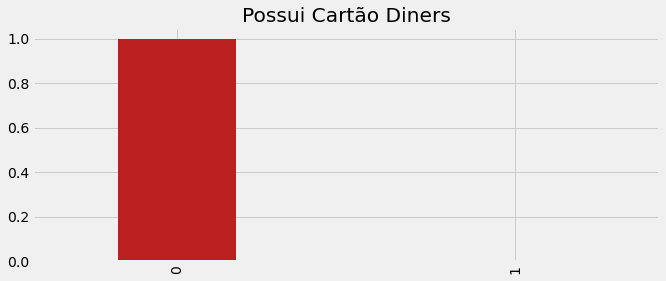

In [140]:
train['possui_cartao_diners'].value_counts().plot.pie(figsize=(4,4))
plt.title('Possui Cartão Diners')
plt.ylabel('')
plt.show()
fig=plt.figure(figsize=(10,4))
train['possui_cartao_diners'].value_counts(normalize=True).plot(kind='bar', figsize=(10,4),width=0.35, color=['#BB2020','#00B032'])
plt.title('Possui Cartão Diners')
plt.show()

In [141]:
tabela_possui_cartao_diners = pd.crosstab(train['possui_cartao_diners'], train['inadimplente'], normalize='index')
tabela_possui_cartao_diners

inadimplente,0,1
possui_cartao_diners,,
0,0.50005,0.49995
1,0.46875,0.53125


### Hipótese 21: Há alguma relação estatísticamente significativa entre as colunas POSSUI_CARTAO_DINERS e INADIMPLENTE ?

<Figure size 720x360 with 0 Axes>

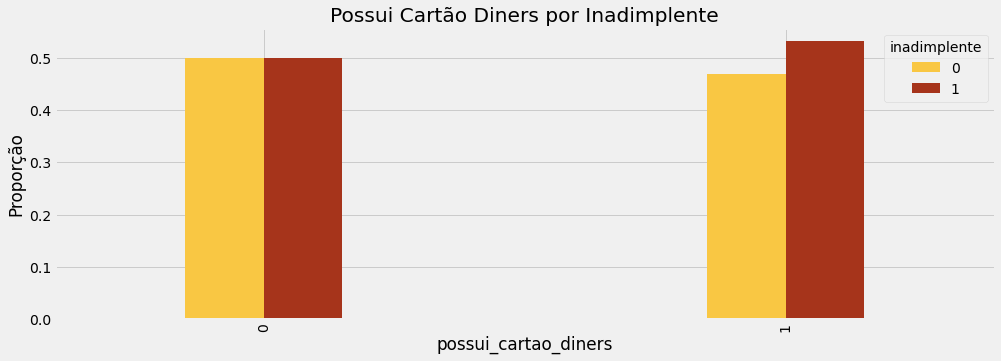

In [142]:
fig=plt.figure(figsize=(10,5))
tabela_possui_cartao_diners.plot(kind='bar', width= 0.3, figsize=(15,5), color=['#F9C743', '#A6341B'])
plt.title('Possui Cartão Diners por Inadimplente')
plt.ylabel('Proporção')
plt.show()

In [143]:
teste_qui_quadrado(train['possui_cartao_diners'], train['inadimplente'])

Hipótese H0: a diferença entre o valor observado e o valor esperado NÃO É estatísticamente diferente de zero (p_valor < significância)
Hipótese H1: a diferença entre o valor observado e o valor esperado É estatísticamente diferente de zero (p_valor > significância)
significância = 0.1

p_valor é 0.8596, NÃO tem relação


Insights:
- Resposta Hipótese 21: Não tem relação
- A apesar do desbalanço na classe alvo pra quem tem cartão diners temos muito poucos dados para fazer diferença significativa 

----------

## 25) possui_cartao_amex

In [144]:
train['possui_cartao_amex'].value_counts()

0    19959
1       41
Name: possui_cartao_amex, dtype: int64

In [145]:
train['possui_cartao_amex'].value_counts(normalize=True)

0    0.99795
1    0.00205
Name: possui_cartao_amex, dtype: float64

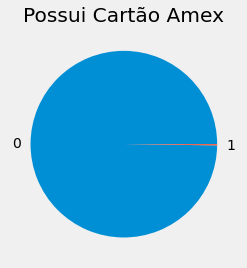

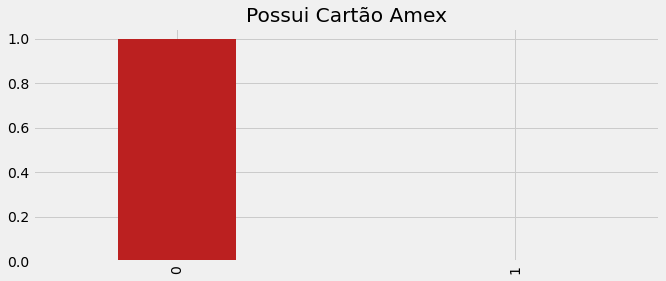

In [146]:
train['possui_cartao_amex'].value_counts().plot.pie(figsize=(4,4))
plt.title('Possui Cartão Amex')
plt.ylabel('')
plt.show()
fig=plt.figure(figsize=(10,4))
train['possui_cartao_amex'].value_counts(normalize=True).plot(kind='bar', figsize=(10,4),width=0.35, color=['#BB2020','#00B032'])
plt.title('Possui Cartão Amex')
plt.show()

In [147]:
tabela_possui_cartao_amex = pd.crosstab(train['possui_cartao_amex'], train['inadimplente'], normalize='index')
tabela_possui_cartao_amex

inadimplente,0,1
possui_cartao_amex,,
0,0.499975,0.500025
1,0.512195,0.487805


### Hipótese 22: Há alguma relação estatísticamente significativa entre as colunas POSSUI_CARTAO_AMEX e INADIMPLENTE ?

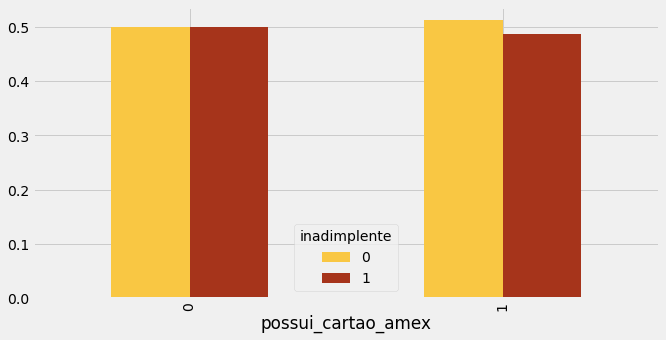

In [148]:
#Dos que possuem cartão amex quual a proporção de não inadimplentes e inadimplentes
tabela_possui_cartao_amex.plot(kind='bar', figsize=(10,5), color=['#F9C743', '#A6341B'])
plt.show()

In [149]:
teste_qui_quadrado(train['possui_cartao_amex'], train['inadimplente'])

Hipótese H0: a diferença entre o valor observado e o valor esperado NÃO É estatísticamente diferente de zero (p_valor < significância)
Hipótese H1: a diferença entre o valor observado e o valor esperado É estatísticamente diferente de zero (p_valor > significância)
significância = 0.1

p_valor é 1.0000, NÃO tem relação


Insights:
- Resposta Hipótese 22: Não tem relação

----------

## 26) possui_outros_cartoes

In [150]:
train['possui_outros_cartoes'].value_counts()

0    19955
1       45
Name: possui_outros_cartoes, dtype: int64

In [151]:
train['possui_outros_cartoes'].value_counts(normalize=True)

0    0.99775
1    0.00225
Name: possui_outros_cartoes, dtype: float64

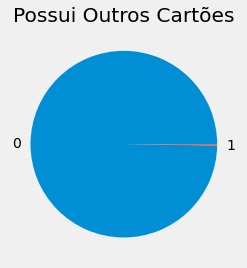

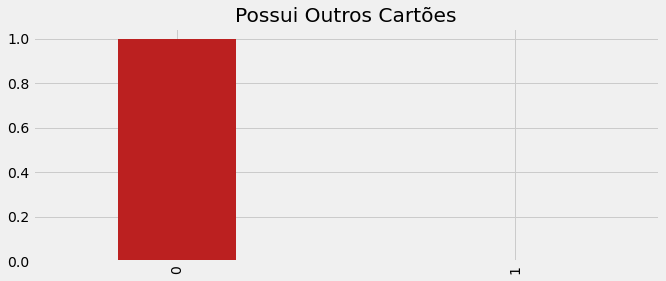

In [152]:
train['possui_outros_cartoes'].value_counts().plot.pie(figsize=(4,4))
plt.title('Possui Outros Cartões')
plt.ylabel('')
plt.show()
fig=plt.figure(figsize=(10,4))
train['possui_outros_cartoes'].value_counts(normalize=True).plot(kind='bar', figsize=(10,4),width=0.35, color=['#BB2020','#00B032'])
plt.title('Possui Outros Cartões')
plt.show()

In [153]:
tabela_possui_outros_cartoes = pd.crosstab(train['possui_outros_cartoes'], train['inadimplente'], normalize='index')
tabela_possui_outros_cartoes

inadimplente,0,1
possui_outros_cartoes,,
0,0.499925,0.500075
1,0.533333,0.466667


### Hipótese 23: Há alguma relação estatísticamente significativa entre as colunas POSSUI_OUTROS_CARTOES e INADIMPLENTE ?

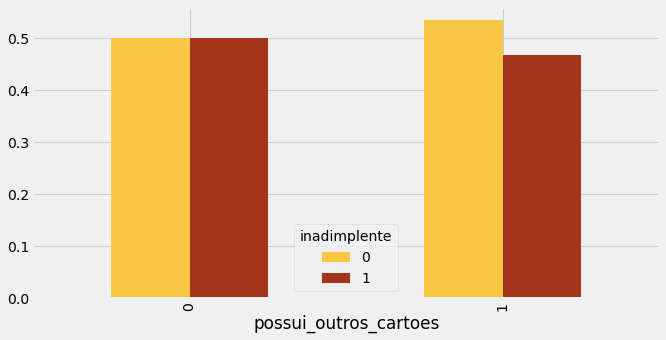

In [154]:
#Dos que possuem cartão amex quual a proporção de não inadimplentes e inadimplentes
tabela_possui_outros_cartoes.plot(kind='bar', figsize=(10,5), color=['#F9C743', '#A6341B'])
plt.show()

In [155]:
teste_qui_quadrado(train['possui_outros_cartoes'], train['inadimplente'])

Hipótese H0: a diferença entre o valor observado e o valor esperado NÃO É estatísticamente diferente de zero (p_valor < significância)
Hipótese H1: a diferença entre o valor observado e o valor esperado É estatísticamente diferente de zero (p_valor > significância)
significância = 0.1

p_valor é 0.7653, NÃO tem relação


Insights:
- Resposta Hipótese 23: Não tem relação.

----------

## 27) qtde_contas_bancarias

In [156]:
train['qtde_contas_bancarias'].value_counts()

0    12786
1     7206
2        8
Name: qtde_contas_bancarias, dtype: int64

In [157]:
train['qtde_contas_bancarias'].value_counts(normalize=True)

0    0.6393
1    0.3603
2    0.0004
Name: qtde_contas_bancarias, dtype: float64

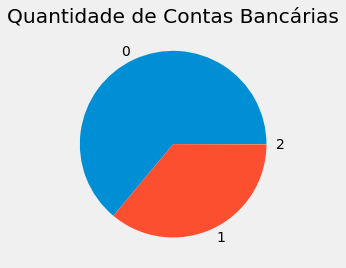

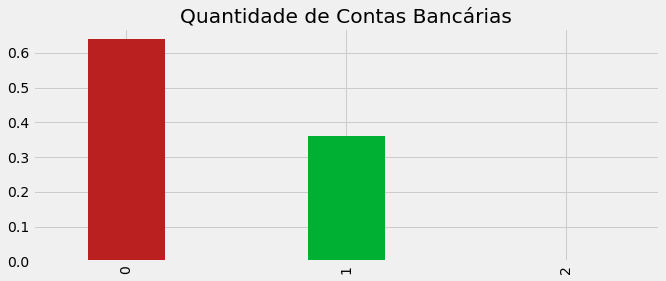

In [158]:
train['qtde_contas_bancarias'].value_counts().plot.pie(figsize=(4,4))
plt.title('Quantidade de Contas Bancárias')
plt.ylabel('')
plt.show()
fig=plt.figure(figsize=(10,4))
train['qtde_contas_bancarias'].value_counts(normalize=True).plot(kind='bar', figsize=(10,4),width=0.35, color=['#BB2020','#00B032'])
plt.title('Quantidade de Contas Bancárias')
plt.show()

In [159]:
tabela_qtde_contas_bancarias1 = pd.crosstab(train['qtde_contas_bancarias'], train['inadimplente'])
tabela_qtde_contas_bancarias1

inadimplente,0,1
qtde_contas_bancarias,,
0,6458,6328
1,3541,3665
2,1,7


In [170]:
tabela_qtde_contas_bancarias = pd.crosstab(train['qtde_contas_bancarias'], train['inadimplente'], normalize='index')
tabela_qtde_contas_bancarias

inadimplente,0,1
qtde_contas_bancarias,,
0,0.505084,0.494916
1,0.491396,0.508604
2,0.125000,0.875000


<Figure size 1080x504 with 0 Axes>

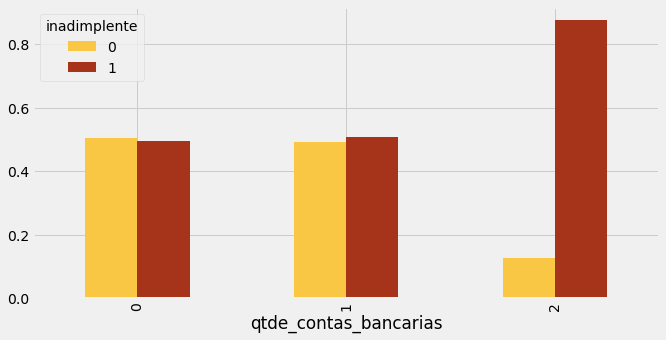

In [172]:
fig=plt.figure(figsize=(15,7))
tabela_qtde_contas_bancarias.plot(kind='bar', color=['#F9C743', '#A6341B'], figsize=(10,5))
plt.show()

Insights:
- Grande desbalanço na classe 2, no entanto ela representa somente 0.4% dos dados.
- Não é possível fazer o teste qui-quadrado pois a tabela_qtde_contas_bancarias1 apresenta o valor menos que 5.

----------

## 28) qtde_contas_bancarias_especiais

In [173]:
train['qtde_contas_bancarias_especiais'].value_counts()

0    12786
1     7206
2        8
Name: qtde_contas_bancarias_especiais, dtype: int64

- A coluna qtde_contas_bancarias_especiais é idêntica a coluna qtde_contas_bancarias, logo será desconsiderada.

----------

## 29) valor_patrimonio_pessoal

In [174]:
train['valor_patrimonio_pessoal'].value_counts()

0.0         19072
25000.0        87
30000.0        86
20000.0        83
50000.0        71
            ...  
320000.0        1
57000.0         1
3500.0          1
69000.0         1
86000.0         1
Name: valor_patrimonio_pessoal, Length: 94, dtype: int64

In [175]:
train['valor_patrimonio_pessoal'].value_counts(normalize=True).head(10)

0.0        0.95360
25000.0    0.00435
30000.0    0.00430
20000.0    0.00415
50000.0    0.00355
15000.0    0.00330
35000.0    0.00315
40000.0    0.00240
45000.0    0.00195
60000.0    0.00185
Name: valor_patrimonio_pessoal, dtype: float64

### Hipótese 24: Há alguma relação estatísticamente significativa entre as colunas VALOR_PATRIMONIO_PESSOAL e INADIMPLENTE ?

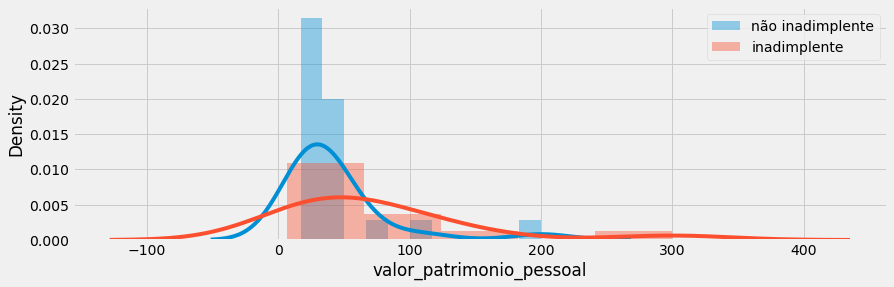

In [176]:
fig=plt.figure(figsize=(13,4))
sns.distplot(a=train.query('inadimplente==0 and valor_patrimonio_pessoal > 0 and valor_patrimonio_pessoal < 500')['valor_patrimonio_pessoal'], label='não inadimplente')
sns.distplot(a=train.query('inadimplente==1 and valor_patrimonio_pessoal > 0 and valor_patrimonio_pessoal < 500')['valor_patrimonio_pessoal'], label='inadimplente')
plt.legend()
plt.show()

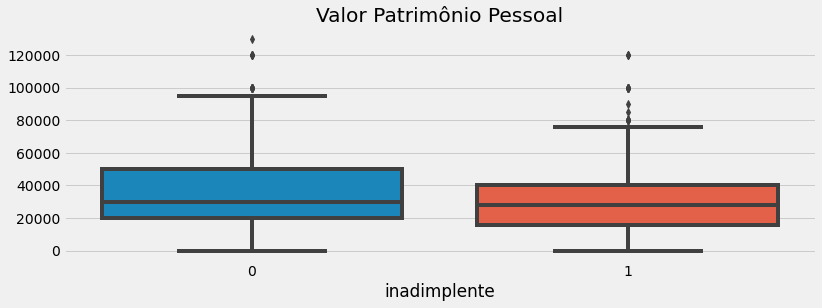

In [177]:
fig=plt.figure(figsize=(12,4))
train_valor_patrimonio_pessoal = train.query('valor_patrimonio_pessoal > 0 and valor_patrimonio_pessoal < 150000 ')
sns.boxplot(x='inadimplente', y='valor_patrimonio_pessoal', data=train_valor_patrimonio_pessoal)
plt.title('Valor Patrimônio Pessoal')
plt.ylabel('')
plt.show()

In [178]:
teste_nao_parametrico(train['valor_patrimonio_pessoal'], train['inadimplente'])

H0: a distribuição das duas amostras são iguais
H1: a distribuição das duas amostras NÃO são iguais
P_valor é 0.0, provavalmente TEM relação


Insights:
- As médias das distribuições estão bem próximas, mas os inadimplentes tendem a ter um patrimonio pessoal maior
- Resposta Hipótese 24: Sim, tem relação

----------

## 30) possui_carro

In [179]:
train['possui_carro'].value_counts()

0    13219
1     6781
Name: possui_carro, dtype: int64

In [180]:
train['possui_carro'].value_counts(normalize=True)

0    0.66095
1    0.33905
Name: possui_carro, dtype: float64

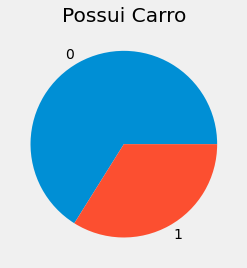

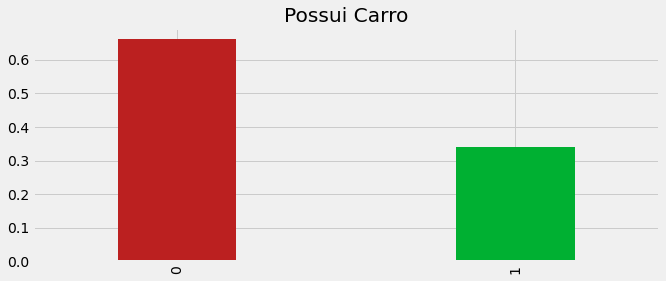

In [181]:
train['possui_carro'].value_counts().plot.pie(figsize=(4,4))
plt.title('Possui Carro')
plt.ylabel('')
plt.show()
fig=plt.figure(figsize=(10,4))
train['possui_carro'].value_counts(normalize=True).plot(kind='bar', figsize=(10,4),width=0.35, color=['#BB2020','#00B032'])
plt.title('Possui Carro')
plt.show()

In [182]:
tabela_possui_carro = pd.crosstab(train['possui_carro'], train['inadimplente'], normalize='index')
tabela_possui_carro

inadimplente,0,1
possui_carro,,
0,0.504577,0.495423
1,0.491078,0.508922


### Hipótese 25: Há alguma relação estatísticamente significativa entre as colunas POSSUI_CARRO e INADIMPLENTE ?

<Figure size 1080x504 with 0 Axes>

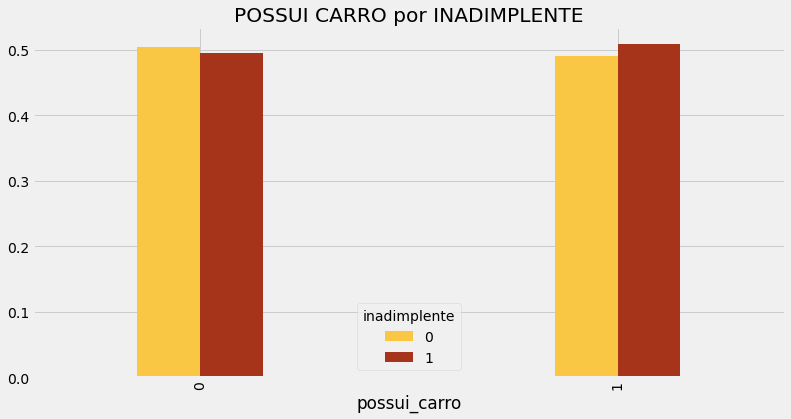

In [183]:
fig=plt.figure(figsize=(15,7))
tabela_possui_carro.plot(kind='bar',width=0.3, color=['#F9C743', '#A6341B'], figsize=(12,6))
plt.title('POSSUI CARRO por INADIMPLENTE')
plt.show()

In [184]:
teste_qui_quadrado(train['possui_carro'], train['inadimplente'])

Hipótese H0: a diferença entre o valor observado e o valor esperado NÃO É estatísticamente diferente de zero (p_valor < significância)
Hipótese H1: a diferença entre o valor observado e o valor esperado É estatísticamente diferente de zero (p_valor > significância)
significância = 0.1

p_valor é 0.0731, TEM relação


Insights:
- Resposta Hipótese 25: Sim, tem relação

--------------------

## 31) vinculo_formal_com_empresa

In [185]:
train['vinculo_formal_com_empresa'].value_counts()

N    11174
Y     8826
Name: vinculo_formal_com_empresa, dtype: int64

In [186]:
train['vinculo_formal_com_empresa'].value_counts(normalize=True)

N    0.5587
Y    0.4413
Name: vinculo_formal_com_empresa, dtype: float64

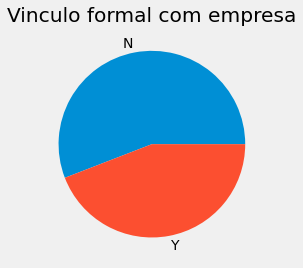

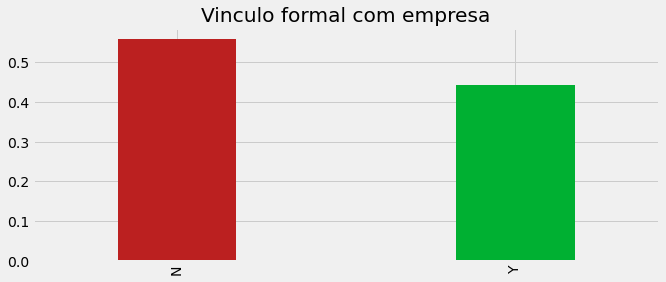

In [187]:
train['vinculo_formal_com_empresa'].value_counts().plot.pie(figsize=(4,4))
plt.title('Vinculo formal com empresa')
plt.ylabel('')
plt.show()
fig=plt.figure(figsize=(10,4))
train['vinculo_formal_com_empresa'].value_counts(normalize=True).plot(kind='bar', figsize=(10,4),width=0.35, color=['#BB2020','#00B032'])
plt.title('Vinculo formal com empresa')
plt.show()

In [188]:
tabela_vinculo_formal_com_empresa = pd.crosstab(train['vinculo_formal_com_empresa'], train['inadimplente'], normalize='index')
tabela_vinculo_formal_com_empresa

inadimplente,0,1
vinculo_formal_com_empresa,,
N,0.502774,0.497226
Y,0.496488,0.503512


### Hipótese 26: Há alguma relação estatísticamente significativa entre as colunas VINCULO_FORMAL_COM_EMPRESA e INADIMPLENTE ?

<Figure size 1080x504 with 0 Axes>

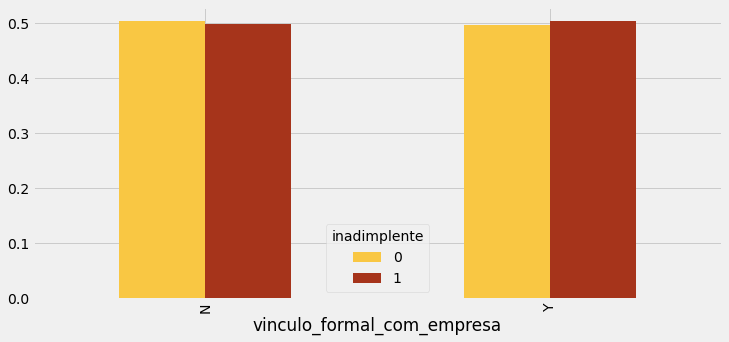

In [189]:
fig=plt.figure(figsize=(15,7))
tabela_vinculo_formal_com_empresa.plot(kind='bar', color=['#F9C743', '#A6341B'],figsize=(11,5))
plt.show()

In [190]:
teste_qui_quadrado(train['vinculo_formal_com_empresa'], train['inadimplente'])

Hipótese H0: a diferença entre o valor observado e o valor esperado NÃO É estatísticamente diferente de zero (p_valor < significância)
Hipótese H1: a diferença entre o valor observado e o valor esperado É estatísticamente diferente de zero (p_valor > significância)
significância = 0.1

p_valor é 0.3850, NÃO tem relação


Insights:
- Resposta Hipótese 26; Não tem relação

----------


## 32) estado_onde_trabalha

In [191]:
train['estado_onde_trabalha'].value_counts()

      13573
SP     1010
RS      819
CE      588
BA      569
MG      500
PE      369
PA      316
PR      236
RJ      229
MT      224
GO      218
RN      212
AL      151
MS      150
PB      132
DF      115
SC      114
ES       86
AP       77
MA       73
RO       61
AM       54
PI       39
AC       36
SE       25
TO       18
RR        6
Name: estado_onde_trabalha, dtype: int64

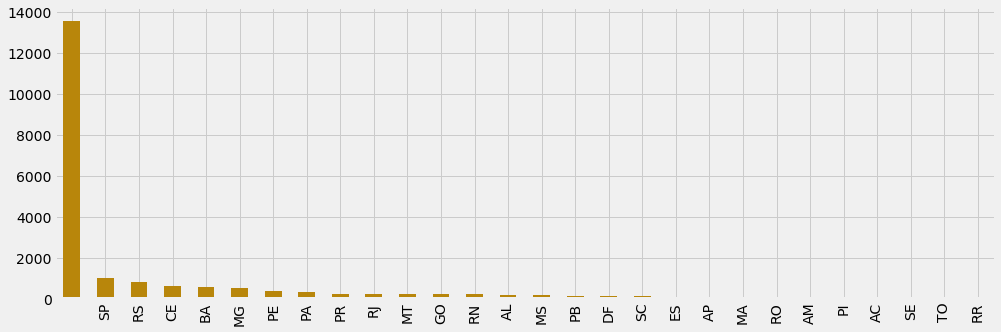

In [192]:
train['estado_onde_trabalha'].value_counts().plot(kind='bar', figsize=(15,5), color='#b8860b')
plt.show()

In [193]:
tabela_estado_onde_nasceu = pd.crosstab(train['estado_onde_nasceu'], train['inadimplente'], normalize='index')
tabela_estado_onde_nasceu

inadimplente,0,1
estado_onde_nasceu,,
,0.504866,0.495134
AC,0.427083,0.572917
AL,0.470501,0.529499
AM,0.489796,0.510204
AP,0.529412,0.470588
BA,0.487877,0.512123
CE,0.495288,0.504712
DF,0.450382,0.549618
ES,0.501992,0.498008


### Hipótese 27: Há alguma relação estatísticamente significativa entre as colunas ESTADO_ONDE_NASCEU e INADIMPLENTE ?

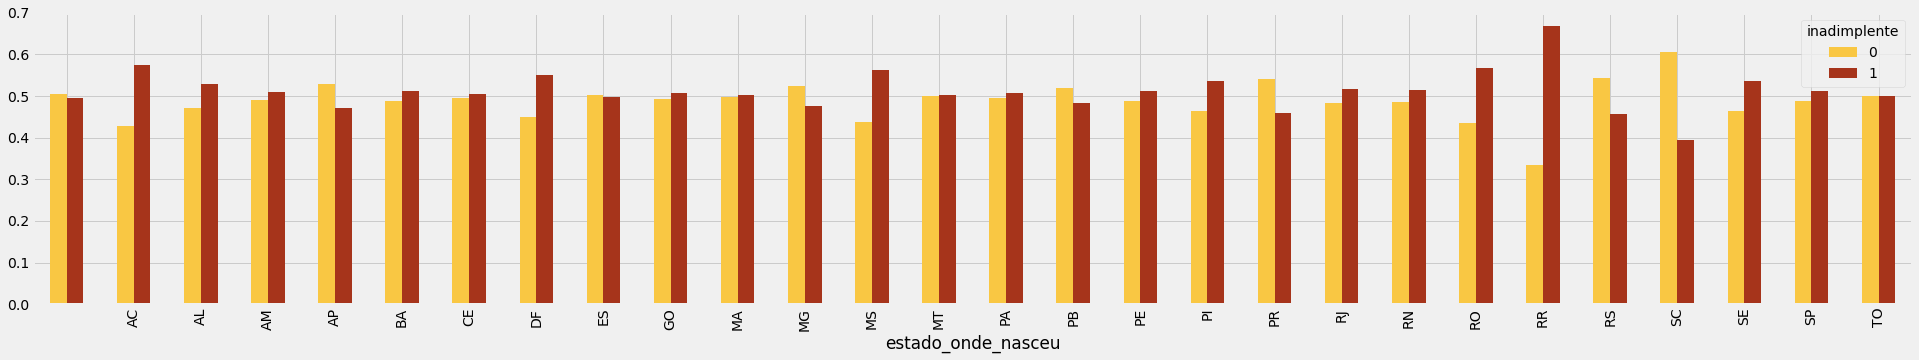

In [194]:
tabela_estado_onde_nasceu.plot(kind='bar', color=['#F9C743', '#A6341B'],figsize=(30,5))
plt.show()

In [195]:
teste_qui_quadrado(train['estado_onde_nasceu'], train['inadimplente'])

Hipótese H0: a diferença entre o valor observado e o valor esperado NÃO É estatísticamente diferente de zero (p_valor < significância)
Hipótese H1: a diferença entre o valor observado e o valor esperado É estatísticamente diferente de zero (p_valor > significância)
significância = 0.1

p_valor é 0.0006, TEM relação


Insights:
- Resultado Hipótese 27: Sim, tem relação
- A classe com mais representações da coluna estado_onde_nasceu está em branco 

----------

## 33) possui_telefone_trabalho

In [196]:
train['possui_telefone_trabalho'].value_counts()

N    14519
Y     5481
Name: possui_telefone_trabalho, dtype: int64

In [197]:
train['possui_telefone_trabalho'].value_counts(normalize=True)

N    0.72595
Y    0.27405
Name: possui_telefone_trabalho, dtype: float64

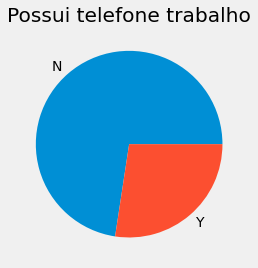

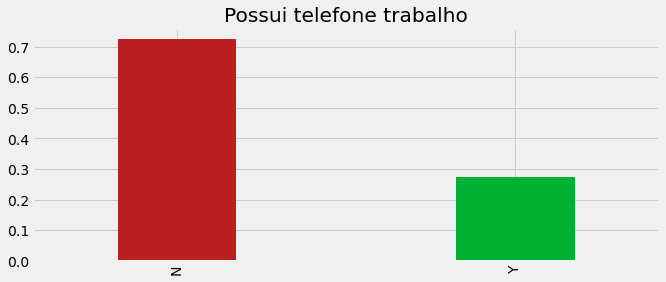

In [198]:
train['possui_telefone_trabalho'].value_counts().plot.pie(figsize=(4,4))
plt.title('Possui telefone trabalho')
plt.ylabel('')
plt.show()
fig=plt.figure(figsize=(10,4))
train['possui_telefone_trabalho'].value_counts(normalize=True).plot(kind='bar', figsize=(10,4),width=0.35, color=['#BB2020','#00B032'])
plt.title('Possui telefone trabalho')
plt.show()

In [199]:
tabela_possui_telefone_trabalho = pd.crosstab(train['possui_telefone_trabalho'], train['inadimplente'], normalize='index')
tabela_possui_telefone_trabalho

inadimplente,0,1
possui_telefone_trabalho,,
N,0.504925,0.495075
Y,0.486955,0.513045


### Hipótese 28: Há alguma relação estatísticamente significativa entre as colunas POSSUI_TELEFONE_TRABALHO e INADIMPLENTE ?

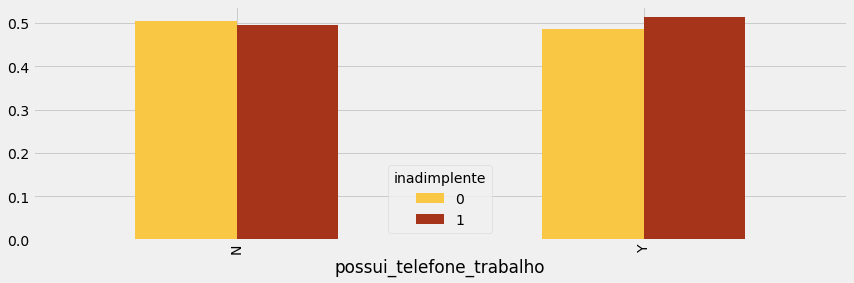

In [200]:
tabela_possui_telefone_trabalho.plot(kind='bar', color=['#F9C743', '#A6341B'],figsize=(13,4))
plt.show()

In [201]:
teste_qui_quadrado(train['possui_telefone_trabalho'], train['inadimplente'])

Hipótese H0: a diferença entre o valor observado e o valor esperado NÃO É estatísticamente diferente de zero (p_valor < significância)
Hipótese H1: a diferença entre o valor observado e o valor esperado É estatísticamente diferente de zero (p_valor > significância)
significância = 0.1

p_valor é 0.0244, TEM relação


Insights:
- Resposta Hipótese 28: Sim, tem relação

----------

## 34) codigo_area_telefone_trabalho     

In [202]:
train['codigo_area_telefone_trabalho'].value_counts(normalize=True)

       0.72625
5      0.03155
54     0.02210
107    0.02035
97     0.01320
        ...   
7      0.00005
74     0.00005
122    0.00005
4      0.00005
115    0.00005
Name: codigo_area_telefone_trabalho, Length: 77, dtype: float64

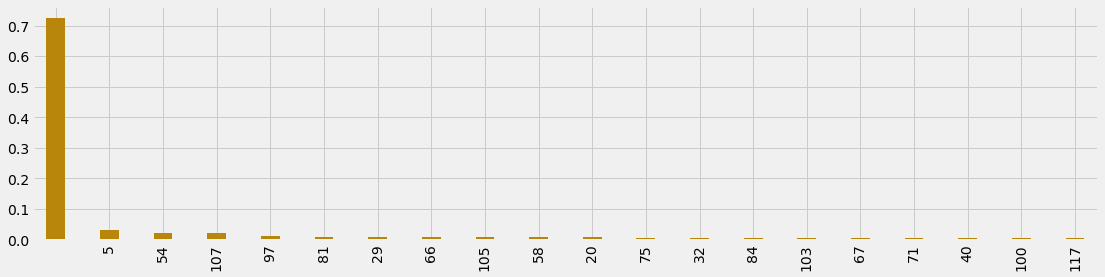

In [203]:
train['codigo_area_telefone_trabalho'].value_counts(normalize=True).head(20).plot(kind='bar', figsize=(17,4), width=0.35, color='#b8860b')
plt.show()

- A Classe vazia representa a maioria dos valores

In [204]:
primeiros_60 = train['codigo_area_telefone_trabalho'].value_counts().head(50).index

tabela_codigo_area_telefone_trabalho = pd.crosstab(train.query('codigo_area_telefone_trabalho in @primeiros_60')['codigo_area_telefone_trabalho'],
                                                   train.query('codigo_area_telefone_trabalho in @primeiros_60')['inadimplente'], normalize='index')

tabela_codigo_area_telefone_trabalho

inadimplente,0,1
codigo_area_telefone_trabalho,,
,0.504854,0.495146
10,0.558824,0.441176
100,0.410714,0.589286
103,0.508197,0.491803
105,0.483516,0.516484
107,0.471744,0.528256
110,0.458333,0.541667
111,0.609756,0.390244
112,0.738095,0.261905


### Hipótese 29: Há alguma relação estatísticamente significativa entre as colunas CODIGO_AREA_TELEFONE_TRABALHO e INADIMPLENTE ?

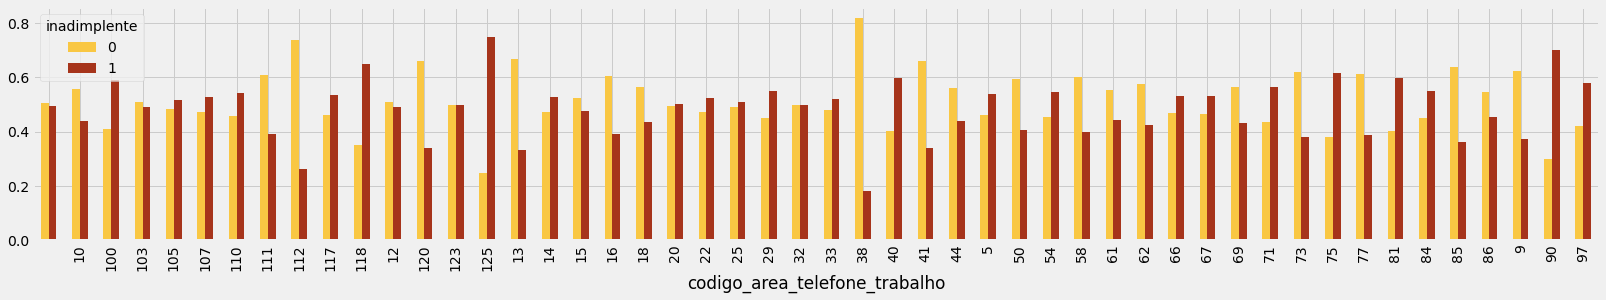

In [205]:
tabela_codigo_area_telefone_trabalho.plot(kind='bar', color=['#F9C743', '#A6341B'],figsize=(25,4))
plt.show()

In [206]:
teste_qui_quadrado(train.query('codigo_area_telefone_trabalho in @primeiros_60')['codigo_area_telefone_trabalho'],
                   train.query('codigo_area_telefone_trabalho in @primeiros_60')['inadimplente'])

Hipótese H0: a diferença entre o valor observado e o valor esperado NÃO É estatísticamente diferente de zero (p_valor < significância)
Hipótese H1: a diferença entre o valor observado e o valor esperado É estatísticamente diferente de zero (p_valor > significância)
significância = 0.1

p_valor é 0.0000, TEM relação


Insights:
- Resposta Hipótese 29: Sim, tem relação

----------

## 35) meses_no_trabalho

In [207]:
train['meses_no_trabalho'].value_counts()

0     19973
1         7
3         4
2         4
6         2
5         2
4         2
15        1
30        1
14        1
12        1
18        1
32        1
Name: meses_no_trabalho, dtype: int64

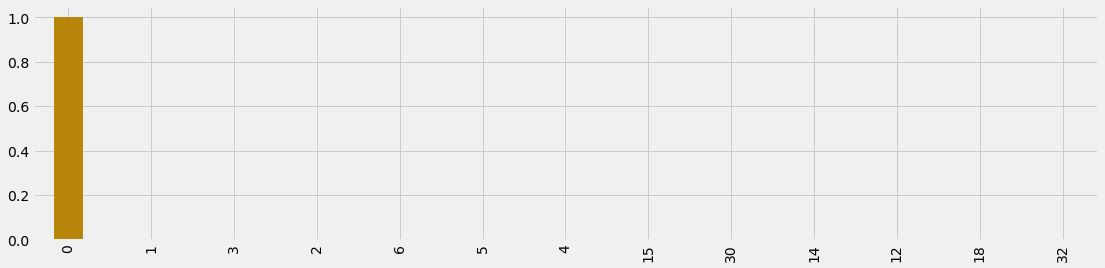

In [208]:
train['meses_no_trabalho'].value_counts(normalize=True).head(15).plot(kind='bar', figsize=(17,4), width=0.35, color='#b8860b')
plt.show()

In [209]:
tabela_meses_no_trabalho = pd.crosstab(train['meses_no_trabalho'], train['inadimplente'], normalize='index')
tabela_meses_no_trabalho

inadimplente,0,1
meses_no_trabalho,,
0,0.499775,0.500225
1,0.714286,0.285714
2,0.750000,0.250000
3,0.500000,0.500000
4,0.500000,0.500000
5,0.500000,0.500000
6,0.000000,1.000000
12,1.000000,0.000000
14,1.000000,0.000000


### Hipótese 30: Há alguma relação estatísticamente significativa entre as colunas MESES_NO_TRABALHO e INADIMPLENTE ?

<Figure size 1080x504 with 0 Axes>

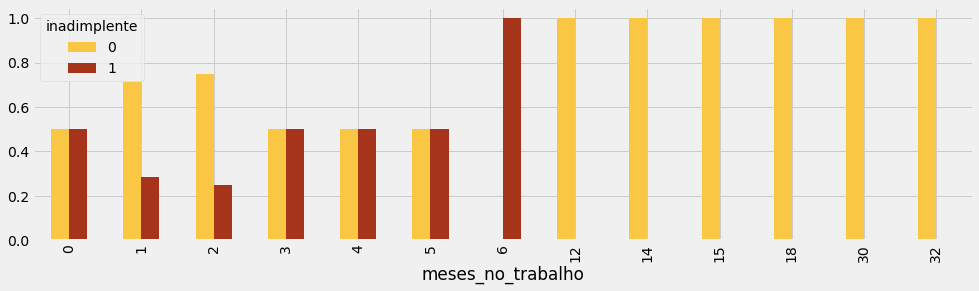

In [210]:
fig=plt.figure(figsize=(15,7))
tabela_meses_no_trabalho.plot(kind='bar', color=['#F9C743', '#A6341B'],figsize=(15,4))
plt.show()

In [211]:
teste_nao_parametrico(train['meses_no_trabalho'], train['inadimplente'])

H0: a distribuição das duas amostras são iguais
H1: a distribuição das duas amostras NÃO são iguais
P_valor é 0.0, provavalmente TEM relação


Insights:
- Pessoas que tabalham há longos períodos em no mesmo trabalho tendem a ser menos inadimplentes
- Resposta Hipótese 30: Sim, tem relação

----------

## 36) profissao                         

In [212]:
train['profissao'].value_counts()

9.0     12103
0.0      1398
11.0     1349
2.0      1171
12.0      192
10.0      173
16.0      126
13.0      125
7.0        89
8.0        61
6.0        47
15.0       25
17.0       16
4.0        13
3.0         7
14.0        6
1.0         1
5.0         1
Name: profissao, dtype: int64

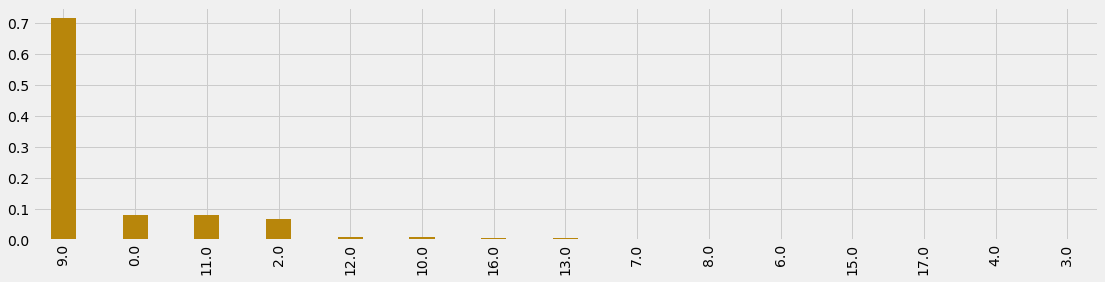

In [213]:
train['profissao'].value_counts(normalize=True).head(15).plot(kind='bar', figsize=(17,4), width=0.35, color='#b8860b')
plt.show()

In [241]:
tabela_profissao = pd.crosstab(train['profissao'], train['inadimplente'], normalize='index')
tabela_profissao

inadimplente,0,1
profissao,,
0.0,0.520029,0.479971
1.0,0.000000,1.000000
2.0,0.456020,0.543980
3.0,0.571429,0.428571
4.0,0.384615,0.615385
5.0,1.000000,0.000000
6.0,0.595745,0.404255
7.0,0.370787,0.629213
8.0,0.360656,0.639344


### Hipótese 31: Há alguma relação estatísticamente significativa entre as colunas PROFISSAO e INADIMPLENTE ?

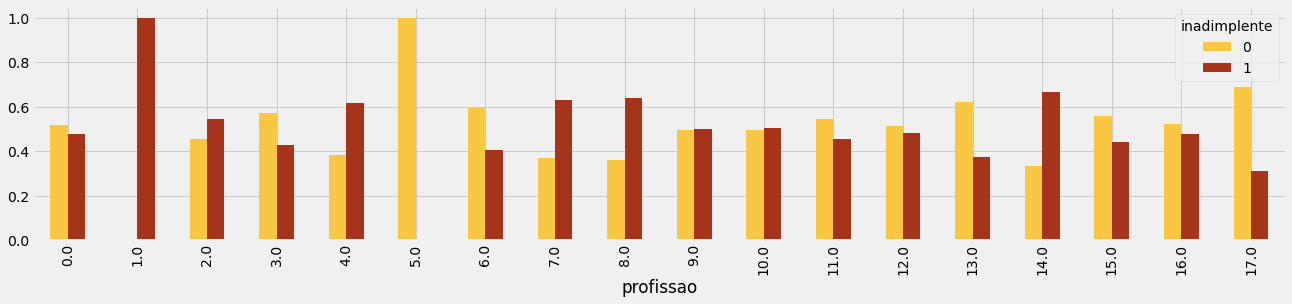

In [242]:
tabela_profissao.plot(kind='bar', color=['#F9C743', '#A6341B'], figsize=(20,4))
plt.show()

In [216]:
#retirei as classes valor menor que 5 da tabela de contingência para não ferir a premissa do teste qui-quadrado.
teste_qui_quadrado(train.query('profissao != 1.0 and profissao != 3.0 and profissao != 5.0 and profissao != 14.0')['profissao'],
                   train.query('profissao != 1.0 and profissao != 3.0 and profissao != 5.0 and profissao != 14.0')['inadimplente'])

Hipótese H0: a diferença entre o valor observado e o valor esperado NÃO É estatísticamente diferente de zero (p_valor < significância)
Hipótese H1: a diferença entre o valor observado e o valor esperado É estatísticamente diferente de zero (p_valor > significância)
significância = 0.1

p_valor é 0.0000, TEM relação


Insights:
- As profissões 0.0, 3.0, 6.0, 11.0, 12.0, 13.0, 15.0, 16.0, 17.0 tendem a ser menos inadimplentesn, no entando algumas desssas classes tem muito poucos valores e podem nos dar conclusões preciputadas.
- Resposta Hipótese 31: Sim, tem relação.

----------

## 37) ocupacao                          

In [217]:
train['ocupacao'].value_counts()

2.0    6882
1.0    3144
4.0    2924
5.0    2822
0.0    1114
3.0     136
Name: ocupacao, dtype: int64

In [243]:
train['ocupacao'].value_counts(normalize=True)

2.0    0.404300
1.0    0.184702
4.0    0.171778
5.0    0.165785
0.0    0.065445
3.0    0.007990
Name: ocupacao, dtype: float64

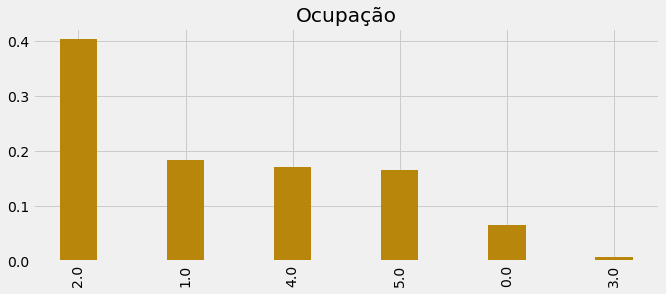

In [218]:
fig=plt.figure(figsize=(10,4))
train['ocupacao'].value_counts(normalize=True).plot(kind='bar', figsize=(10,4),width=0.35, color='#b8860b')
plt.title('Ocupação')
plt.show()

- 40% das classes pertencem a ocupação 2.0

In [219]:
tabela_ocupacao = pd.crosstab(train['ocupacao'], train['inadimplente'], normalize='index')
tabela_ocupacao

inadimplente,0,1
ocupacao,,
0.0,0.507181,0.492819
1.0,0.581743,0.418257
2.0,0.484016,0.515984
3.0,0.514706,0.485294
4.0,0.467510,0.532490
5.0,0.489369,0.510631


### Hipótese 32: Há alguma relação estatísticamente significativa entre as colunas OCUPACAO e INADIMPLENTE ?

<Figure size 1080x504 with 0 Axes>

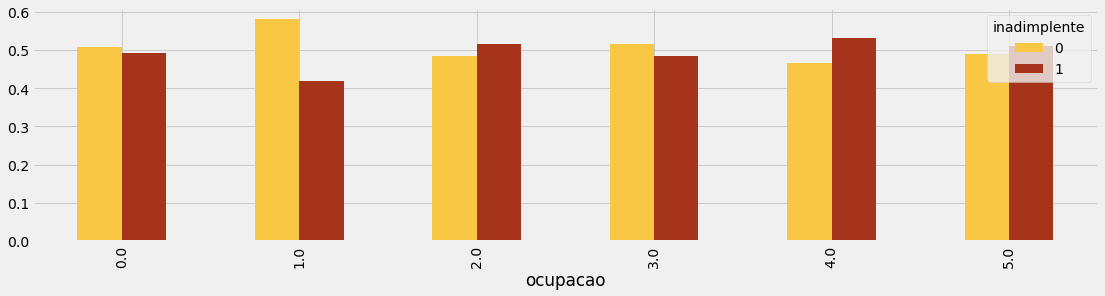

In [220]:
fig=plt.figure(figsize=(15,7))
tabela_ocupacao.plot(kind='bar', color=['#F9C743', '#A6341B'], figsize=(17,4))
plt.show()

In [221]:
teste_qui_quadrado(train['ocupacao'], train['inadimplente'])

Hipótese H0: a diferença entre o valor observado e o valor esperado NÃO É estatísticamente diferente de zero (p_valor < significância)
Hipótese H1: a diferença entre o valor observado e o valor esperado É estatísticamente diferente de zero (p_valor > significância)
significância = 0.1

p_valor é 0.0000, TEM relação


Insights:
- O tipo de ocupação 1 é o que tende a ser menos inadimplente.
- Resposta Hipótese 32: Sim, tem relação.

----------

## 38) profissao_companheiro             

In [222]:
train['profissao_companheiro'].value_counts()

0.0     5551
11.0    2358
9.0      409
16.0      78
2.0       39
12.0      15
10.0      13
6.0        9
13.0       5
17.0       3
8.0        3
14.0       1
3.0        1
1.0        1
Name: profissao_companheiro, dtype: int64

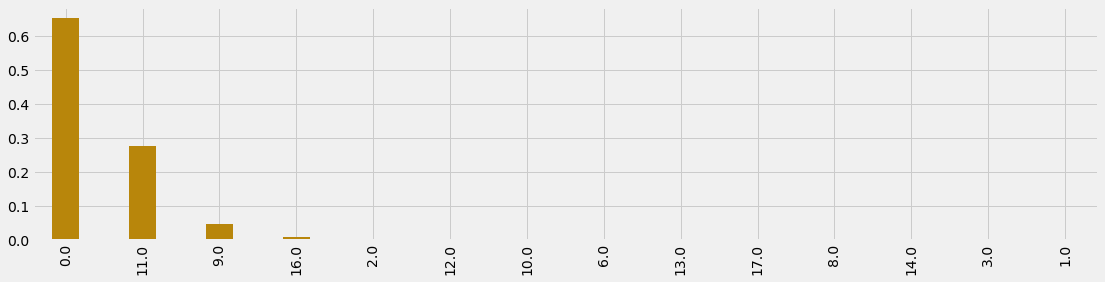

In [223]:
train['profissao_companheiro'].value_counts(normalize=True).head(15).plot(kind='bar', figsize=(17,4), width=0.35, color='#b8860b')
plt.show()

In [224]:
tabela_profissao_companheiro = pd.crosstab(train['profissao_companheiro'], train['inadimplente'], normalize='index')
tabela_profissao_companheiro

inadimplente,0,1
profissao_companheiro,,
0.0,0.486579,0.513421
1.0,0.000000,1.000000
2.0,0.717949,0.282051
3.0,0.000000,1.000000
6.0,0.666667,0.333333
8.0,0.666667,0.333333
9.0,0.567237,0.432763
10.0,0.230769,0.769231
11.0,0.521628,0.478372


### Hipótese 33: Há alguma relação estatísticamente significativa entre as colunas PROFISSAO_COMPANHEIRO e INADIMPLENTE ?

<Figure size 1080x504 with 0 Axes>

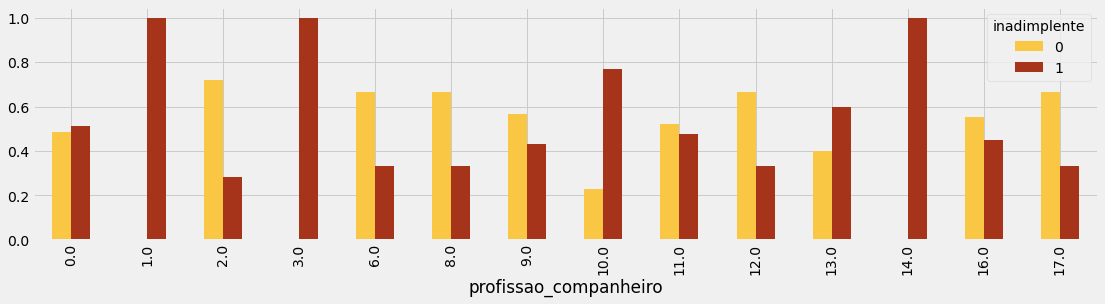

In [225]:
fig=plt.figure(figsize=(15,7))
tabela_profissao_companheiro.plot(kind='bar', color=['#F9C743', '#A6341B'], figsize=(17,4))
plt.show()

In [226]:
teste_qui_quadrado(train['profissao_companheiro'], train['inadimplente'])

Hipótese H0: a diferença entre o valor observado e o valor esperado NÃO É estatísticamente diferente de zero (p_valor < significância)
Hipótese H1: a diferença entre o valor observado e o valor esperado É estatísticamente diferente de zero (p_valor > significância)
significância = 0.1

p_valor é 0.0011, TEM relação


Insights:
- As três profissões mais frequêntes tentem a ser menos inadimplentes.
- Resposta Hipótese 33: Sim, tem relação.

----------

## 39) grau_instrucao_companheiro                     

In [227]:
train['grau_instrucao_companheiro'].value_counts()

0.0    6485
3.0     245
4.0     244
2.0     132
1.0      22
5.0      12
Name: grau_instrucao_companheiro, dtype: int64

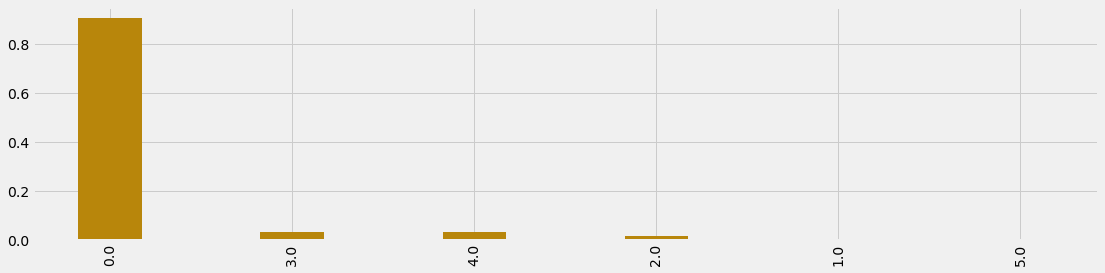

In [228]:
train['grau_instrucao_companheiro'].value_counts(normalize=True).head(15).plot(kind='bar', figsize=(17,4), width=0.35, color='#b8860b')
plt.show()

In [244]:
tabela_grau_instrucao_companheiro = pd.crosstab(train['grau_instrucao_companheiro'], train['inadimplente'], normalize='index')
tabela_grau_instrucao_companheiro

inadimplente,0,1
grau_instrucao_companheiro,,
0.0,0.489283,0.510717
1.0,0.681818,0.318182
2.0,0.530303,0.469697
3.0,0.571429,0.428571
4.0,0.549180,0.450820
5.0,0.833333,0.166667


### Hipótese 34: Há alguma relação estatísticamente significativa entre as colunas GRAU_INSTRUCAO_COMPANHEIRO e INADIMPLENTE ?

<Figure size 1080x504 with 0 Axes>

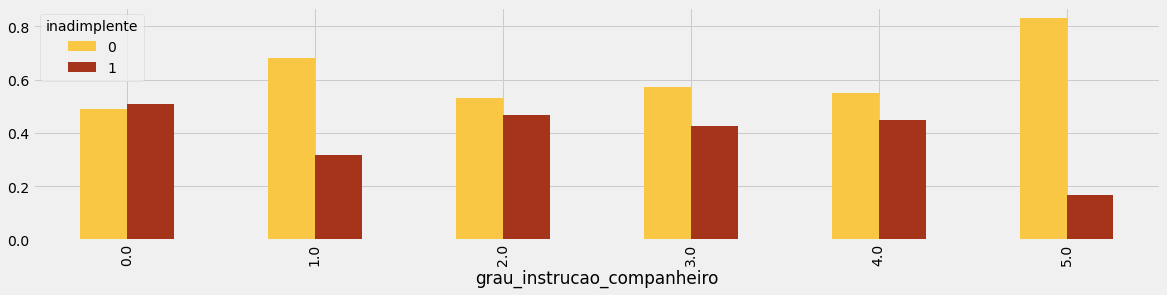

In [245]:
fig=plt.figure(figsize=(15,7))
tabela_grau_instrucao_companheiro.plot(kind='bar', color=['#F9C743', '#A6341B'], figsize=(18,4))
plt.show()

In [231]:
#retirei as linhas com grau de instrução iguais a 5 pois atrapalham a premissa do teste qui-quadrado.
teste_qui_quadrado(train.query('grau_instrucao_companheiro != 5')['grau_instrucao_companheiro'], train.query('grau_instrucao_companheiro != 5')['inadimplente'])

Hipótese H0: a diferença entre o valor observado e o valor esperado NÃO É estatísticamente diferente de zero (p_valor < significância)
Hipótese H1: a diferença entre o valor observado e o valor esperado É estatísticamente diferente de zero (p_valor > significância)
significância = 0.1

p_valor é 0.0105, TEM relação


Insights:
- Apenas grau de instrução 0.0 tem um número maior de inadimplentes.
- Resposta Hipótese 34: Sim, tem relação.

----------

## 40) local_onde_reside                 

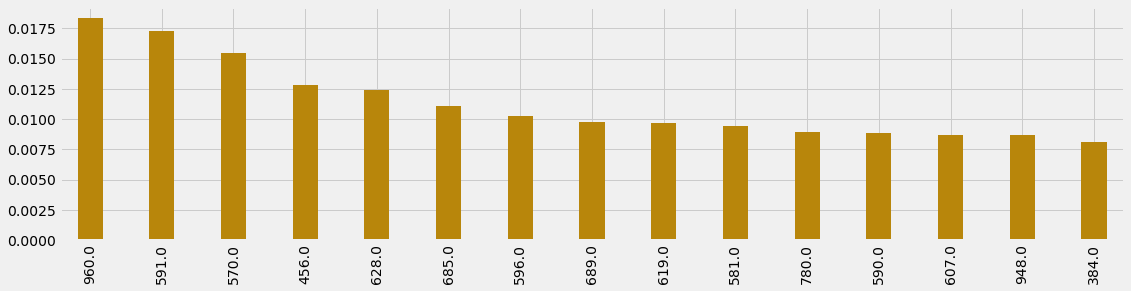

In [233]:
train['local_onde_reside'].value_counts(normalize=True).head(15).plot(kind='bar', figsize=(17,4), width=0.35, color='#b8860b')
plt.show()

In [234]:
train['local_onde_reside'].value_counts().head()

tabela_local_onde_reside = pd.crosstab(train['local_onde_reside'], train['inadimplente']).sample(20)
tabela_local_onde_reside

inadimplente,0,1
local_onde_reside,,
706.0,7,1
154.0,4,4
414.0,2,1
187.0,10,7
476.0,6,4
900.0,3,3
724.0,14,15
227.0,4,6
585.0,2,0


### Hipótese 35: Há alguma relação estatísticamente significativa entre as colunas LOCAL_ONDE_RESIDE e INADIMPLENTE ?

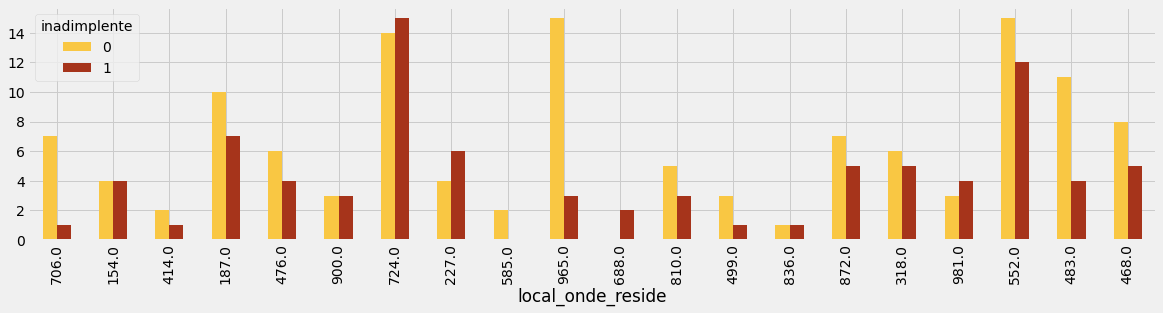

In [235]:
tabela_local_onde_reside.plot(kind='bar', color=['#F9C743', '#A6341B'], figsize=(18,4))
plt.show()

In [236]:
teste_qui_quadrado(train['local_onde_reside'], train['inadimplente'])

Hipótese H0: a diferença entre o valor observado e o valor esperado NÃO É estatísticamente diferente de zero (p_valor < significância)
Hipótese H1: a diferença entre o valor observado e o valor esperado É estatísticamente diferente de zero (p_valor > significância)
significância = 0.1

p_valor é 0.0000, TEM relação


Insights:
- Resposta Hipótese 35: Sim, tem relação

----------

## 41) local_onde_trabalha               

In [237]:
train['local_onde_trabalha'].value_counts()

960.0    367
591.0    345
570.0    310
456.0    256
628.0    249
        ... 
537.0      1
971.0      1
856.0      1
337.0      1
505.0      1
Name: local_onde_trabalha, Length: 743, dtype: int64

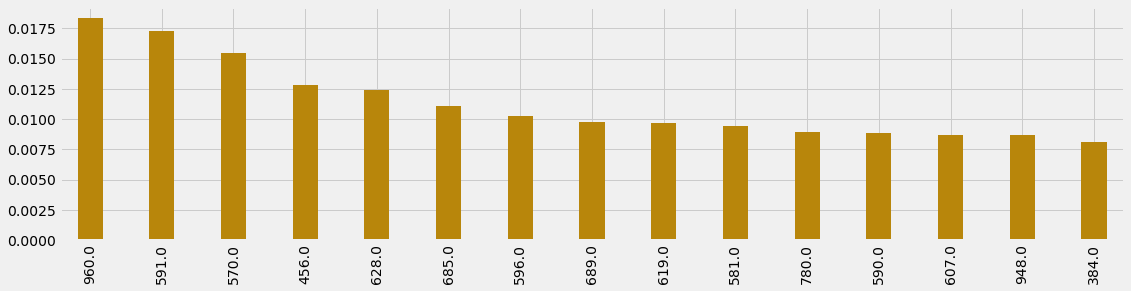

In [238]:
train['local_onde_trabalha'].value_counts(normalize=True).head(15).plot(kind='bar', figsize=(17,4), width=0.35, color='#b8860b')
plt.show()

- Essa coluna é idêntica a coluna local_onde_reside, logo será descartada

# Importando os dados

Pegando a base de dados(dados de treino e teste) de um arquivo CSV e dropando colunas que não terão utilidade para nosso modelo)

In [253]:
#IMPORTANDO OS DADOS

#importando os dados de Treino com o -pd.read_csv-
train = pd.read_csv('conjunto_de_treinamento.csv').drop(['grau_instrucao', 'local_onde_trabalha','possui_telefone_celular'], axis=1)
#retirando outliers da variável qtde_dependentes
train = train.query('qtde_dependentes < 53')

#importando os dados de Teste com o -pd.read_csv-
test = pd.read_csv('conjunto_de_teste.csv').drop(['grau_instrucao', 'local_onde_trabalha', 'possui_telefone_celular'], axis=1)

# Preprocessamento de dados

#### Nesta etapa os passos principais envolveram transformação das colunas com letras ou palavras em números, como estarei usando apenas modelos baseados em árvore nesse projeto a performance do modelo não será afetada
- Transformação das classes features com letras ou palavras para numeros em categorias
- Algumas classes que quase não apareceram foram transformadas nas classes com maior frequência
- Classes com valores '  ' (espaço) foram substituidas por uma classe numérica categórica ## Preprocessamento

In [254]:
#Preprocessamento de dados
#binarizando a coluna SEXO
train['sexo'] = train['sexo'].map({'F':0, 'M':1, 'N':0, '':0})
test['sexo'] = test['sexo'].map({'F':0, 'M':1, 'N':0, '':0})

#binarizando a coluna POSSUI_TELEFONE_CELULAR
train['possui_telefone_residencial'] = train['possui_telefone_residencial'].map({'Y':1, 'N':0})
test['possui_telefone_residencial'] = test['possui_telefone_residencial'].map({'Y':1, 'N':0})

#binarizando a coluna VINCULO_FORMAL_COM_EMPRESA
train['vinculo_formal_com_empresa'] = train['vinculo_formal_com_empresa'].map({'Y':1, 'N':0})
test['vinculo_formal_com_empresa'] = test['vinculo_formal_com_empresa'].map({'Y':1, 'N':0})

#binarizando a coluna POSSUI_TELEFONE_TRABALHO
train['possui_telefone_trabalho'] = train['possui_telefone_trabalho'].map({'Y':1, 'N':0})
test['possui_telefone_trabalho'] = test['possui_telefone_trabalho'].map({'Y':1, 'N':0})

#transformando em inteiros a coluna FORMA_ENVIO_SOLICITACAO
train['forma_envio_solicitacao'] = train['forma_envio_solicitacao'].map({'correio':0, 'internet':1, 'presencial':2 })
test['forma_envio_solicitacao'] = test['forma_envio_solicitacao'].map({'correio':0, 'internet':1, 'presencial':2 })

#preenchendo os valores ' ' da coluna CODIGO_AREA_TELEFONE_RESIDENCIAL
train['codigo_area_telefone_residencial'] = train['codigo_area_telefone_residencial'].map(lambda i: 1000 if i==' ' else i )
test['codigo_area_telefone_residencial'] = test['codigo_area_telefone_residencial'].map(lambda i: 1000 if i==' ' else i )

#preenchendo os valores ' ' da coluna CODIGO_AREA_TELEFONE_RESIDENCIAL
train['codigo_area_telefone_trabalho'] = train['codigo_area_telefone_trabalho'].map(lambda i: 1000 if i==' ' else i )
test['codigo_area_telefone_trabalho'] = test['codigo_area_telefone_trabalho'].map(lambda i: 1000 if i==' ' else i )

train = pd.get_dummies(train, columns=['estado_onde_trabalha', 'tipo_endereco', 'estado_onde_nasceu'])
test = pd.get_dummies(test, columns=['estado_onde_trabalha', 'tipo_endereco', 'estado_onde_nasceu'])

y = train['inadimplente']

# Engenharia de features

A engenharia de features é uma das formas de melhorar a performance do modelo, testei várias hipóteses de novas features, mas só algunas foram úteis
#### Melhorou a performance:
- região_onde_reside --> Separei os estados em grupos chamados regiões que são as regiões do Brasil
- meses_residencia_trabalho --> Divisão entre as colunas meses_no_trabalho e meses_na_residencia (somei 1 no denominador para evitar divisões por zero)

#### Não melhorou a performance:
- renda_per_capta --> Renda mensal pela quantidade de dependentes

#### Indiferente
- tempo_de_vida_no_trabalho --> Qual a porcentagem da vida que a pessoase se dedicou nesse trabalho


In [255]:
#criando coluna regiao_onde_reside_n, agrupei os estados por região
train['regiao_onde_reside_n'] = train['estado_onde_reside'].map({'SP':1, 'RJ':1,'MG':1, 'ES':1,                                          #Sudeste
                                                               'MA':2, 'PI':2, 'CE':2, 'BA':2,'RN':2, 'PE':2, 'SE':2, 'PB':2, 'AL':2,    #Nordeste
                                                                'PR':3, 'SC':3, 'RS':3,                                                  #Sul
                                                               'AM':4, 'PA':4, 'RR':4, 'AC':4, 'RO':4, 'AP':4, 'TO':4,                   #Norte
                                                               'MT':5, 'MS':5, 'GO':5, 'DF':5})                                          #Centro-Oeste
test['regiao_onde_reside_n'] = test['estado_onde_reside'].map({'SP':1, 'RJ':1,'MG':1, 'ES':1,
                                                               'MA':2, 'PI':2, 'CE':2, 'BA':2,'RN':2, 'PE':2, 'SE':2, 'PB':2, 'AL':2,
                                                                'PR':3, 'SC':3, 'RS':3,
                                                               'AM':4, 'PA':4, 'RR':4, 'AC':4, 'RO':4, 'AP':4, 'TO':4,
                                                               'MT':5, 'MS':5, 'GO':5, 'DF':5})

#divisão entre meses no trabalho por meses na residencia 
train['meses_residencia_trabalho'] = (train['meses_no_trabalho']/(train['meses_na_residencia']+1))
test['meses_residencia_trabalho'] = (test['renda_mensal_regular']*test['meses_no_trabalho']/(train['meses_na_residencia']+1))

#divisão entra renda mensal por quantidade de dependentes
train['renda_per_capta_mensal'] = train['renda_mensal_regular']/(train['qtde_dependentes']+1)
test['renda_per_capta_mensal'] = test['renda_mensal_regular']/(test['qtde_dependentes']+1)

#qual a porcentagem da vida que a pessoase dedicou nesse trabalho
train['tempo_de_vida_no_trabalho'] = train['meses_no_trabalho']/(train['idade']*12)
test['tempo_de_vida_no_trabalho'] = test['meses_no_trabalho']/(test['idade']*12)

train['codigo_area_telefone_residencial'] = train['codigo_area_telefone_residencial'].astype(int)
train['codigo_area_telefone_trabalho'] = train['codigo_area_telefone_trabalho'].astype(int)

test['codigo_area_telefone_residencial'] = test['codigo_area_telefone_residencial'].astype(int)
test['codigo_area_telefone_trabalho'] = test['codigo_area_telefone_trabalho'].astype(int)

## separando features que serão usadas no modelo em um dataframe

In [256]:
X = train[['produto_solicitado', 'dia_vencimento','idade', 'sexo', 'estado_civil','qtde_dependentes', 'nacionalidade', 'possui_telefone_residencial',
          'possui_email', 'tipo_residencia','meses_na_residencia', 'renda_mensal_regular', 'renda_extra', 'possui_carro','possui_cartao_visa',
           'possui_cartao_mastercard', 'possui_cartao_diners','possui_cartao_amex', 'possui_outros_cartoes', 'meses_no_trabalho', 'profissao', 'local_onde_reside'
           ,'grau_instrucao_companheiro','codigo_area_telefone_residencial', 'codigo_area_telefone_trabalho','regiao_onde_reside_n', 'meses_residencia_trabalho',
           'estado_onde_trabalha_RS', 'estado_onde_trabalha_SE','tipo_endereco_1', 'possui_telefone_trabalho', 'estado_onde_nasceu_AM', 'estado_onde_nasceu_CE'
          ]]
       
#preenchendo valores faltantes com -1(modelos baseados em árvores desconsideram valores negativos)
X = X.fillna(-1)

## Testando uma Lista de alguns modelos para avaliar a performance

In [257]:
modelos = list()
nomes = ['KNN', 'Decision Tree', 'Random Forest', 'Ada Boosting', 'Gradient Boosting',
         'Extra Trees', 'Logistic Regression MinMax', 'Logistic Regression Std','Light GBM',
         'XGBoost']

mdl_knn = make_pipeline(MinMaxScaler(), KNeighborsClassifier())
mdl_dt = DecisionTreeClassifier(random_state=29)
mdl_rf = RandomForestClassifier(random_state=29)
mdl_ada = AdaBoostClassifier(random_state=29)
mdl_gbm = GradientBoostingClassifier(random_state=29)
mdl_et = ExtraTreesClassifier(random_state=29)
mdl_lr_mm = make_pipeline(MinMaxScaler(), LogisticRegression())
mdl_lr_std = make_pipeline(StandardScaler(), LogisticRegression())
mdl_lgbm = make_pipeline(MinMaxScaler(),LGBMClassifier(random_state=29))
mdl_xgb = xgb.XGBClassifier(random_state=29)

modelos.append(mdl_knn)
modelos.append(mdl_dt)
modelos.append(mdl_rf)
modelos.append(mdl_ada)
modelos.append(mdl_gbm)
modelos.append(mdl_et)
modelos.append(mdl_lr_mm)
modelos.append(mdl_lr_std)
modelos.append(mdl_lgbm)
modelos.append(mdl_xgb)

kf = RepeatedKFold(n_splits=8,  n_repeats=5, random_state=29)

for i, mdl in enumerate(modelos):
    score = cross_val_score(mdl, X, y, scoring='accuracy', cv=kf)
    print(nomes[i])
    print('Média {:.4f}'.format(score.mean()))
    print('Desvio Padrão {:.4f}'.format(score.std()))
    print('')

KNN
Média 0.5397
Desvio Padrão 0.0091

Decision Tree
Média 0.5304
Desvio Padrão 0.0082

Random Forest
Média 0.5788
Desvio Padrão 0.0091

Ada Boosting
Média 0.5885
Desvio Padrão 0.0096

Gradient Boosting
Média 0.5948
Desvio Padrão 0.0110

Extra Trees
Média 0.5658
Desvio Padrão 0.0086

Logistic Regression MinMax
Média 0.5790
Desvio Padrão 0.0108

Logistic Regression Std
Média 0.5789
Desvio Padrão 0.0108

Light GBM
Média 0.5941
Desvio Padrão 0.0098

[19:46:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:46:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'.

### Os modelos com melhores resultados foram:
- Logistic Regression
- GBM
- Light GBM
- XGBoost

# Tunando os modelos

## -Logistic Regression (MinMaxScaler)-

In [ ]:
mdl_lr_mm = make_pipeline(MinMaxScaler(), LogisticRegression(C=1))
scores = cross_val_score(mdl_lr_mm, X, y, scoring='accuracy', cv=kf).mean()
print('accuracy:  ',n, scores)


## -GBM-

In [ ]:
#foi tunado variando os parâmetros manualmente com iterações
kf = RepeatedKFold(n_splits=8,  n_repeats=5, random_state=29)

mdl_gbm = GradientBoostingClassifier(n_estimators=190, learning_rate=0.15, max_depth=3, random_state=29)
scores = cross_val_score(mdl_gbm, X, y, scoring='accuracy', cv=kf).mean()
print('accuracy:  ', scores)

## -Light GBM-

In [273]:
#foi tunado variando os parâmetros manualmente com iterações
kf = RepeatedKFold(n_splits=8,  n_repeats=5, random_state=29)

mdl_lgbm = make_pipeline(StandardScaler(),LGBMClassifier(n_estimators=395, learning_rate=0.04, num_leaves=23, max_depth=8, random_state=29))
scores = cross_val_score(mdl_lgbm, X, y, scoring='accuracy', cv=kf).mean()
print('accuracy:  ',scores)

#accuracy:   395 0.5964198879551821

accuracy:   193 0.596589955982393


## -XGBoost-

In [271]:
#foi tunado variando os parâmetros manualmente com iterações
kf = RepeatedKFold(n_splits=8,  n_repeats=5, random_state=29)

mdl_lgbm = xgb.XGBClassifier(n_estimators=188, learning_rate=0.09, max_depth=4, eval_metric='logloss', random_state=29)
scores = cross_val_score(mdl_lgbm, X, y, scoring='accuracy', cv=kf).mean()
print('accuracy:  ', scores)
#accuracy:   0.5981497919167668
#accuracy:   0.5981497919167668

accuracy:   0.5981297919167667


- Depois de verificar que a coluna estado_onde_trabalha piorou nossa acurácia separei as suas classes em dummies e testei uma por vez no modelo, ou seja, adicionei as dummies dos estados para ver se melhorava minha validação e os únicos estados que ajudaram a melhorar a acurácia do modelo foram RS e SE.
- Depois de verificar que a coluna tipo_endereco piorou nossa acurácia separei as suas classes em dummies e testei uma por vez no modelo, e a coluna dummies tipo_endereco_1 melhorou minha valicação
- Depois de verificar que a coluna estado_onde_nasceu piorou nossa acurácia separei as suas classes em dummies e testei uma por vez no modelo, ou seja, adicionei as dummies dos estados para ver se melhorava minha validação e os únicos estados que ajudaram a melhorar a acurácia do modelo foram AM e CE.


# ENSEMBLES

In [277]:
Voting = VotingClassifier(estimators=[('RandomForest',mdl_rf), ('LightGBM', mdl_lgbm), ('GBM',mdl_gbm), ('LR MM', mdl_lr_mm)], voting='soft')
scores_voting = cross_val_score(Voting, X, y, scoring='accuracy', cv=kf).mean()
print('Voting Classifier')
print('acurácia: ', scores_voting)
#acurácia:  0.5976466622867045 rf lgbm gbm lrmm

Voting Classifier
acurácia:  0.5983999239695879


# Prevendo dados Teste

In [285]:
X_test = test[['produto_solicitado', 'dia_vencimento','idade', 'sexo', 'estado_civil','qtde_dependentes', 'nacionalidade', 'possui_telefone_residencial',
          'possui_email', 'tipo_residencia','meses_na_residencia', 'renda_mensal_regular', 'renda_extra', 'possui_carro','possui_cartao_visa',
           'possui_cartao_mastercard', 'possui_cartao_diners','possui_cartao_amex', 'possui_outros_cartoes', 'meses_no_trabalho', 'profissao', 'local_onde_reside'
           ,'grau_instrucao_companheiro','codigo_area_telefone_residencial', 'codigo_area_telefone_trabalho','regiao_onde_reside_n', 'meses_residencia_trabalho',
           'estado_onde_trabalha_RS', 'estado_onde_trabalha_SE','tipo_endereco_1', 'possui_telefone_trabalho', 'estado_onde_nasceu_AM', 'estado_onde_nasceu_CE'
          ]]

X_test = X_test.fillna(-1)
Voting.fit(X, y)

p = Voting.predict(X_test)

sub = pd.Series(p, index=test['id_solicitante'], name='inadimplente')

sub.to_csv("Trab_1.csv", header=True)

# Importances

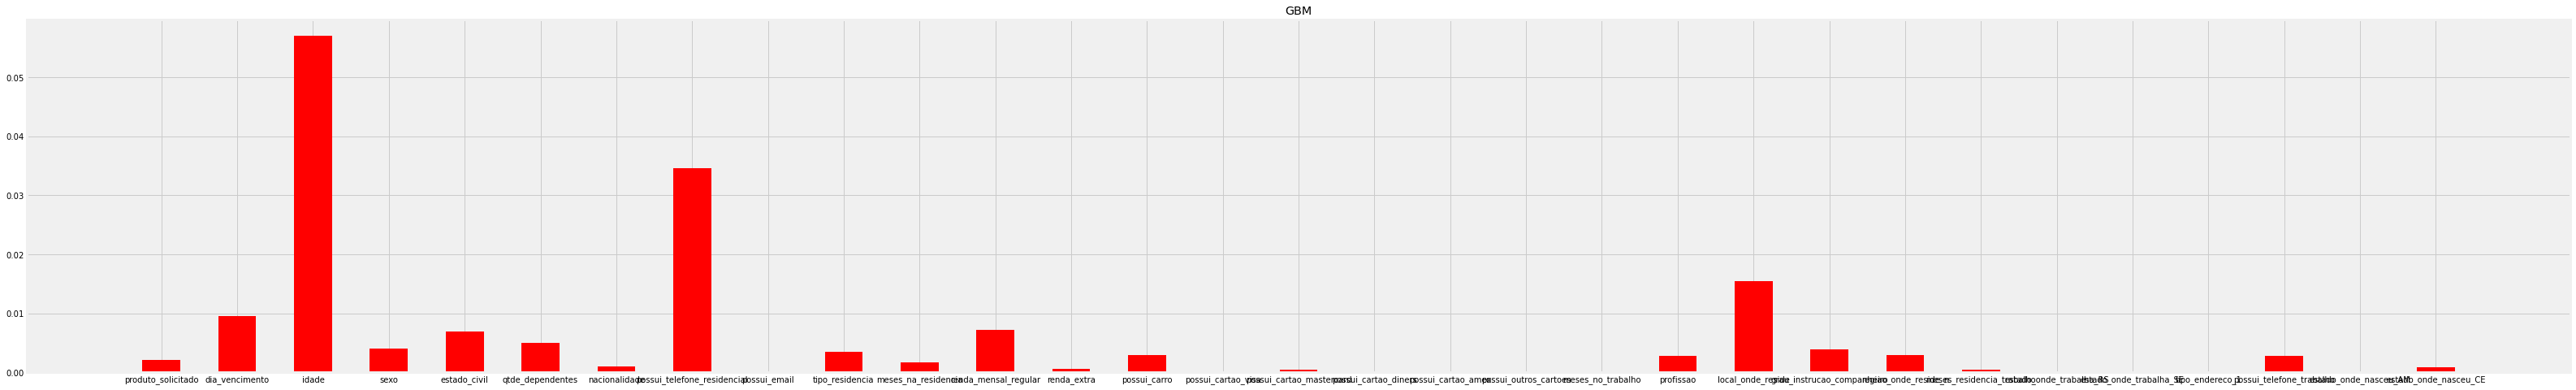

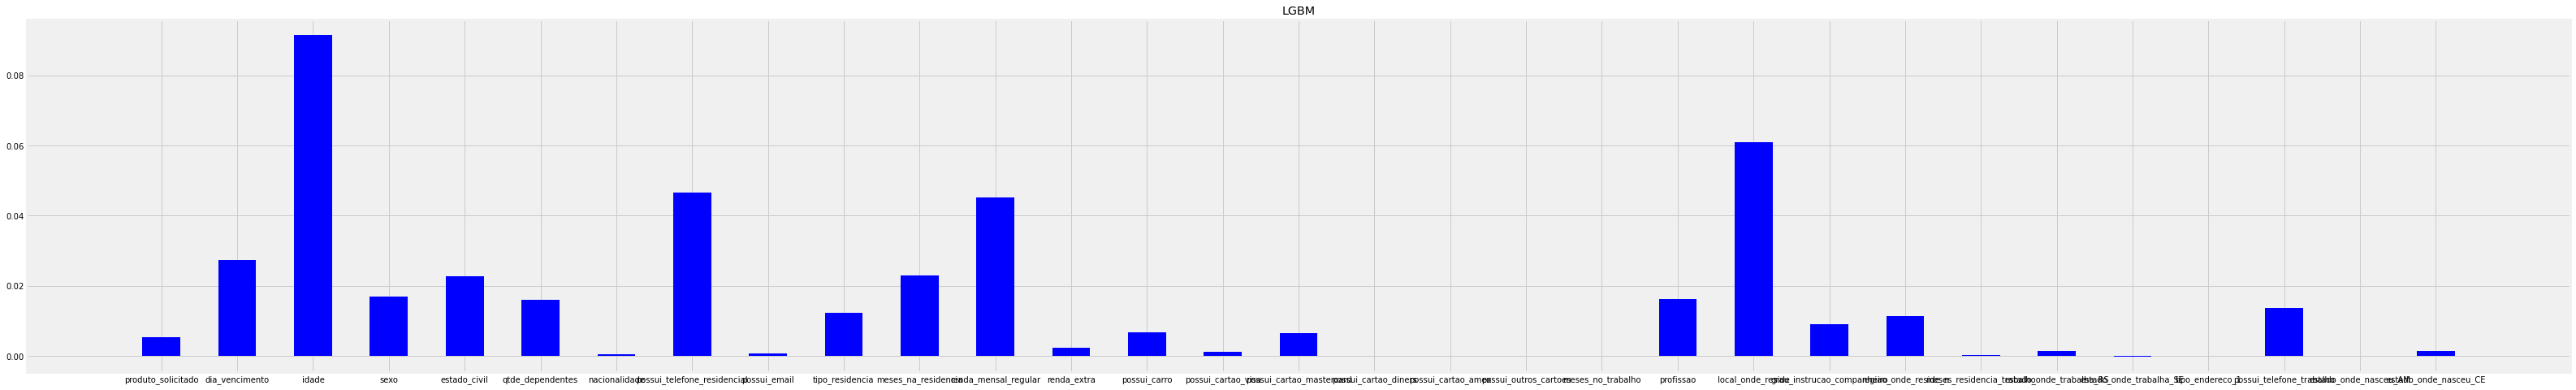

In [286]:
from sklearn.inspection import permutation_importance

#dropando colunas com valores do tipo "object".
X.drop(['codigo_area_telefone_residencial', 'codigo_area_telefone_trabalho'], axis=1, inplace=True)

#instanciando e treinando os modelos GBM e LightGBM. 
mdl_gbm = GradientBoostingClassifier(random_state=29)
mdl_lgbm = LGBMClassifier(random_state=29)
mdl_gbm.fit(X, y)
mdl_lgbm.fit(X, y)

#criando objetos para as Importances de cada modelo
importances_gbm = permutation_importance(mdl_gbm, X, y, scoring='accuracy', n_repeats=2, n_jobs=-1, random_state=29)
importances_lgbm = permutation_importance(mdl_lgbm, X, y, scoring='accuracy', n_repeats=2, n_jobs=-1, random_state=29)

#transformando o Array em Series
imp_gbm = pd.Series(importances_gbm['importances_mean'])
imp_lgbm = pd.Series(importances_lgbm['importances_mean'])

#criando os gráficos com as Importances de cada modelo (GBM e LGBM)
x = X.columns

fig=plt.figure(figsize=(50,8))
y= imp_gbm
plt.bar(x, y, color='red', width=0.5, label='GBM')
plt.title('GBM')
plt.show()

fig=plt.figure(figsize=(50,8))
y= imp_lgbm
plt.bar(x, y, color='blue', width=0.5, label='lGBM')
plt.title('LGBM')
plt.show()